# Installing and importing all the required python libraries and modules

In [ ]:
# !pip install numpy --break-system-packages
# !pip install pandas --break-system-packages
# !pip install matplotlib --break-system-packages
# !pip install seaborn --break-system-packages
# !pip install sklearn --break-system-packages
# !pip install imblearn --break-system-packages
# !pip install lazypredict --break-system-packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl
import os

from lazypredict.Supervised import LazyClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import Lasso

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from category_encoders.binary import BinaryEncoder
import lightgbm as lgb
from sklearn.linear_model import PassiveAggressiveClassifier,RidgeClassifierCV
from sklearn.neighbors import NearestCentroid
from sklearn.svm import LinearSVC

# i. Data Collection and Loading

In [2]:
df = pd.read_csv('mentalhealthsurvey_Report21_06.csv')
df.head()

Consent What country are you from? What is your ethnic group?  \
0  Agreed          The United States                      White   
1  Agreed                    Nigeria                      Black   
2  Agreed                      India                      Asian   
3  Agreed                         US                      White   
4  Agreed                    nigeria                      Black   

  What is your biological gender? What is your year of birth?  \
0                          Female                        1998   
1                            Male                        1992   
2                            Male                        1999   
3                            Male                        2000   
4                          Female                       <1990   

  In which country is the institution where you are studying located?  \
0                                       The European                    
1                        United Kingdom, Southampton                    
2                                              India                    
3                                                 US                    
4                                                 uk                    

  Are you a home student or an international student?  \
0                                   European student    
1                                       Home student    
2                              International student    
3                                       Home student    
4                              International student    

  Are you full-time or part-time student?  \
0               I am a full-time student.   
1               I am a full-time student.   
2               I am a full-time student.   
3               I am a full-time student.   
4               I am a full-time student.   

                 What is your course of study?  \
0  Bachelor of Science in Software Engineering   
1                                          Msc   
2                                          BCA   
3                                     History.   
4                          AI and Data science   

  What year of study are you currently in?  ...  \
0                   Undergraduate 4th year  ...   
1                    Postgraduate 1st year  ...   
2                    Postgraduate 1st year  ...   
3                   Undergraduate 2nd year  ...   
4                    Postgraduate 1st year  ...   

   Do you feel like your timetabling structure has any impact on your study, life and health?  \
0               Yes, on my life, health and studies.                                            
1               Yes, on my life, health and studies.                                            
2                        Yes, on my life and health.                                            
3  No, it has no impact on my study nor life or h...                                            
4               Yes, on my life, health and studies.                                            

   In what way(s) has the timetabling structure impacted your life and health?  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

  In what way(s) has the timetabling structure impacted your studies?  \
0                                                NaN                    
1                                                NaN                    
2                                                NaN                    
3                                                NaN                    
4                                                NaN                    

  In what way(s) has the timetab

# ii. Data Cleaning

In [3]:
# changing the column headers
column_rename_all = {
    'What country are you from?': 'home_country',
    'What is your ethnic group?': 'ethnic_group',
    'What is your biological gender?': 'gender',
    'What is your year of birth?': 'year_of_birth',
    'In which country is the institution where you are studying located?': 'institution_country',
    'Are you a home student or an international student?': 'student_type_location',
    'Are you full-time or part-time student?': 'student_type_time',
    'What is your course of study?': 'course_of_study',
    'What year of study are you currently in?': 'year_of_study',
    'What are the approximate costs for your studies? (tuition fee per year of study, in pound £)': 'cost_of_study',
    'Do you receive any kind of financial support for your studies?': 'financial_support',
    'Do you normally encounter financial issues paying your fees?': 'financial_problems',
    'How would you rate your family class? (Family earnings per year)': 'family_earning_class',
    'How many hours per week do you have active lectures? (Active means attending lectures)': 'hours_per_week_lectures',
    'How many hours do you spend on university related work per week during exams?': 'hours_per_week_university_work',
    'Do you feel stressed before exams? (multiple choice)': 'stress_before_exams',
    'Do you feel that the university stresses you out in general? (multiple choice)': 'stress_in_general',
    'Are you in any form of employment?': 'form_of_employment',
    'In which field do you work?': 'work_field',
    'How many hours per week do you work?': 'work_hours_per_week',
    'How would you define your quality of life? (as defined below by the World Health Organization 2012)': 'quality_of_life',
    'Do you have any known disabilities?': 'known_disabilities',
    'What kind of disability?': 'kind_disabilities',
    'Please enter your disability:': 'enter_disability',
    'Would you say that you have mental health issues?': 'mental_health_issues_personal_declaration',
    'Why do you consider yourself having mental health issues?': 'mental_health_issues_reasons',
    'Have you ever sought help for your mental health problems?': 'sought_help_mental_issues',
    'What kind of help have you sought?': 'sought_help_mental_issues_type',
    'Which kind of service(s) have helped you?': 'sought_help_mental_issues_type_helped',
    'Have you been diagnosed with mental health issues by a professional?': 'diagnosed_professional',
    'How long ago were you diagnosed? (in years)': 'diagnosed_issues_time',
    'What type of mental health issue were you diagnosed with?': 'mental_health_issue_diagnosed',
    'What type of mental health issue (which is not listed above) were you diagnosed with?': 'mental_health_issue_diagnosed_additional',
    'Has any member of your family been diagnosed with a mental illness?': 'mental_health_family',
    'How often in the last week or two did you feel afraid that something awful might happen?': 'feel_afraid',
    'How would you define your alcohol consumption?': 'alcohol_consumption',
    'Would you say that you are normally well hydrated?': 'well_hydrated',
    'Would you describe your current diet as healthy and balanced?': 'diet',
    'What kind of devices do you use regularly in your daily life?': 'devices',
    'How many hours per day do you spend on a desktop device?': 'hours_desktop',
    'How many hours per day do you spend on a laptop?': 'hours_laptop',
    'How many hours per day do you spend on a smartphone?': 'hours_smartphone',
    'How many hours per day do you spend on other device(s)?': 'hours_other',
    'What kind of (above not listed) device do you use?': 'device_other',
    'Do you use any kind of social media?': 'social_media_use',
    'What social media platforms do you use?': 'social_platform',
    'How many hours per day you spend on Facebook?': 'social_facebook',
    'How many hours per day spend on Instagram?': 'social_instagram',
    'How many hours per day do you spend on Snapchat?': 'social_snapchat',
    'How many hours per day do you spend on TikTok?': 'social_tiktok',
    'How many hours per day do you spend on Twitter?': 'social_twitter',
    'How many hours per day do you spend on other platform(s)?': 'social_other_hours',
    'What kind of (above not listed) social media platform do you use?': 'social_other',
    'Would you consider yourself an intro- or extrovert person? (Definitions from Oxford Languages)': 'personality_type',
    'How often do you exercise per week?': 'exercise_per_week',
    'How many hours do you socialize on a weekly basis? (Meeting other people, participating in social activities, etc.)': 'hours_socialising',
    'How many hours do you normally have between lectures per day?': 'hours_between_lectures',
    'Do you prefer your timetable to be spread or compact so that you have less stress at university? (e.g. 1-2 busy days or 3-4 days with less lectures)': 'timetable_preference',
    'What are the reasons for your timetable preference?': 'timetable_preference_reasons',
    'Do you feel like your timetabling structure has any impact on your study, life and health?_OUTDATED': 'ts_impact_outdated',
    'Do you feel like your timetabling structure has any impact on your study, life and health?': 'ts_impact',
    'In what way(s) has the timetabling structure impacted your life and health?': 'ts_lifehealth',
    'In what way(s) has the timetabling structure impacted your studies?': 'ts_studies',
    'In what way(s) has the timetabling structure impacted your life, health and studies?': 'ts_full'}

In [4]:
df.rename(columns=column_rename_all, inplace=True)

### Replace NULLs in ts_impact and ts_impact_outdated

In [5]:
New = []
for x,y in zip(df['ts_impact'],df['ts_impact_outdated']):
    if (x in [np.nan,'nan']) and (y not in [np.nan,'nan']):
        New.append(y)
    elif (x not in [np.nan,'nan']) and (y in [np.nan,'nan']):
        New.append(x)
    elif (x not in [np.nan,'nan']) and (y not in [np.nan,'nan']):
        New.append(x)
    else:
        New.append(np.nan)

df = df.drop(['ts_impact','ts_impact_outdated'],axis=1)
df['ts_impact_Grouped'] = New

# iii. Feature Engineering

In [6]:
#correcting name of home_country
nig_name = ['Nigeria','Nig.','Oyo state','nigeria','Nigérian','osun state','NIGERIA','Nigerian']
ind_name = ['India','Indian']
uk_name = ['United kingdom','england','U','UK','The UK','Britain','london','Wales','Uk','uk','United Kingdom','England']
ger_name =['Germany','Deutschland','germany']
usa_name =['US','The United States','us','United state']

for value in nig_name:
        df.replace({'home_country': {value: 'Nigeria'}}, inplace=True)
for value in ind_name:
        df.replace({'home_country': {value: 'India'}}, inplace=True)
for value in uk_name:
        df.replace({'home_country': {value: 'United Kingdom'}}, inplace=True)
for value in ger_name:
        df.replace({'home_country': {value: 'Germany'}}, inplace=True)
for value in usa_name:
        df.replace({'home_country': {value: 'United States of America'}}, inplace=True)


In [7]:
#correcting institutional country
#correcting name of home_country
nig_name = ['Offa Nigeria','kwara state','Nigeria','Nig.','Oyo state','Offa','Kwara state','gd','Federal polytechnic Offa','nigeria','Nigérian','osun state','NIGERIA','Nigerian','Offa kwara state','Federal polytechnic Offa']
ind_name = ['India','Indian','India']
uk_name = ['United kindgom','united kingdom','London','The Uk','southampton','United kingdom','United KIngdom','wqe','United Kingdom, Southampton','UNITED KINGDOM','england','U','UK','The UK','Britain','london','Wales','Uk','uk','United Kingdom','England']
ger_name =['Germany','Deutschland','germany','Hochschule Ansbach','Bonn']
usa_name =['United State','US','The United States','us','United state']

for value in nig_name:
        df.replace({'institution_country': {value: 'Nigeria'}}, inplace=True)
for value in ind_name:
        df.replace({'institution_country': {value: 'India'}}, inplace=True)
for value in uk_name:
        df.replace({'institution_country': {value: 'United Kingdom'}}, inplace=True)
for value in ger_name:
        df.replace({'institution_country': {value: 'Germany'}}, inplace=True)
for value in usa_name:
        df.replace({'institution_country': {value: 'United States of America'}}, inplace=True)

In [9]:
df.student_type_time = df.student_type_time.replace(['I am a full-time student.'],'Full Time')
df.student_type_time = df.student_type_time.replace(['I am a part-time student.'],'Part Time')

In [10]:
#renaming the stress_before_exams 
value_yes = ['Yes (due to university work)',
             'Yes (due to university work), Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (due to university work), Yes (due to employment related issues)',
             'Yes (due to employment related issues)',
             'Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (due to university work), Yes (due to employment related issues), Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (combination of two or more of the above)',
             'Yes (due to employment related issues), Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (due to university work), Yes (due to employment related issues), Yes (due to other circumstances such as health, family issues, etc.), Yes (combination of two or more of the above)',
             'Yes (due to university work), Yes (due to employment related issues), Yes (combination of two or more of the above)',
             'Yes (due to university work), Yes (due to other circumstances such as health, family issues, etc.), Yes (combination of two or more of the above)',
             'Yes (due to university work), No'
                         ]
for value in value_yes:
        df.replace({'stress_before_exams': {value: 'Yes'}}, inplace=True)

In [11]:
# changing the stress in general
for value in value_yes:
        df.replace({'stress_in_general': {value: 'Yes'}}, inplace=True)

In [12]:
#chaning form_of_employment
df.form_of_employment = df.form_of_employment.replace(['Yes, I am part-time employed.'],'Part Time')
df.form_of_employment = df.form_of_employment.replace(['I am unemployed.'],'Unemployed')
df.form_of_employment = df.form_of_employment.replace(['Yes, I am full-time employed.'],'Full Time')
df.form_of_employment = df.form_of_employment.replace(['I do my own business.'],'Self Employed')

In [13]:
# chaning quality_of_life
df.quality_of_life = df.quality_of_life.replace(['Medium quality of life.'],'Medium')
df.quality_of_life = df.quality_of_life.replace(['High quality of life.'],'High')
df.quality_of_life = df.quality_of_life.replace(['Very high quality of life'],'Very High')
df.quality_of_life = df.quality_of_life.replace(['Low quality of life.'],'Low')
df.quality_of_life = df.quality_of_life.replace(['Very low quality of life.'],'Very Low')

In [14]:
# chaning alcohol_consumption
df.alcohol_consumption = df.alcohol_consumption.replace(["I don't drink alcohol."],'No Drinks')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption is below moderate."],'Below Moderate')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption is above moderate."],'Above Moderate')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption is moderate."],'Moderate')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption less moderate."],'Less Moderate')

In [15]:
#chaning diet
df.diet = df.diet.replace(['Yes, I think my diet is healthy.'],'Healthy')
df.diet = df.diet.replace(['I think my diet is somewhat inbetween.'],'Somewhat Inbetween')
df.diet = df.diet.replace(['No, I think my diet is unhealthy.'],'Unhealthy')

In [16]:
#chaning personality_type
df.personality_type = df.personality_type.replace(['Introvert (a quiet person who is more interested in their own thoughts and feelings than in spending time with other people)'],'Introvert')
df.personality_type = df.personality_type.replace(['Extrovert (​a lively and confident person who enjoys being with other people)'],'Extrovert')

In [17]:
#dropping various above listed columns
df.drop(['Consent','kind_disabilities','enter_disability','mental_health_issues_reasons','sought_help_mental_issues',
         'sought_help_mental_issues_type','sought_help_mental_issues_type_helped','diagnosed_issues_time',
         'mental_health_issue_diagnosed','mental_health_issue_diagnosed_additional','mental_health_family','feel_afraid',
         'devices','social_platform','timetable_preference_reasons',
         'ts_lifehealth','ts_studies','ts_full','If applicable: What is the email address of the person who referred you?',
         'How did you find out about this questionnaire?','Is there anything else you would like to comment on?','Added Time',
         'Referrer Name','Task Owner','What are the approximate costs for your studies? (tuition fee per year of study, in pound £).1'],axis=1, inplace=True)

In [18]:
# creating a list of social media and devices
social_list = ['social_facebook','social_instagram','social_snapchat','social_tiktok','social_twitter','social_other_hours']
devices_list = ['hours_desktop','hours_laptop','hours_smartphone','hours_other']

# combing the hours of social media
df['total_social_media_hours'] = df[social_list].sum(axis=1).astype(np.int64)

# combining the hours of device usage
df['total_device_hours'] = df[devices_list].sum(axis=1).astype(np.int64)

# dropping social list, devices list ,devices, social_platform 
df.drop(['social_facebook','social_instagram','social_snapchat','social_tiktok','social_twitter','social_other_hours','hours_desktop','hours_laptop','hours_smartphone','hours_other','device_other','social_other'],axis=1,inplace=True)

In [19]:
# filling the empty values of work_hours_per_week
df.work_hours_per_week = df.work_hours_per_week.fillna(0)

# Compute age

In [20]:
def get_age(data):
    if '<' in data:
        age = 2022-int(data.split('<')[1])
        return age
    elif '>' in data:
        age = 2022-int(data.split('>')[1])
        return age
    else:
        age = 2022-int(data)
        return age
        
df['year_of_birth'] = df['year_of_birth'].apply(get_age)

# iv. Data Exploration and Statistical Analysis

In [21]:
df.head(10)

home_country ethnic_group  gender  year_of_birth  \
0  United States of America        White  Female             24   
1                   Nigeria        Black    Male             30   
2                     India        Asian    Male             23   
3  United States of America        White    Male             22   
4                   Nigeria        Black  Female             32   
5                     India        Asian  Female             22   
6                     India        Asian  Female             32   
7                   Nigeria        Black  Female             28   
8                     India        Asian  Female             30   
9            United Kingdom        White    Male             22   

        institution_country  student_type_location student_type_time  \
0              The European       European student         Full Time   
1            United Kingdom           Home student         Full Time   
2                     India  International student         Full Time   
3  United States of America           Home student         Full Time   
4            United Kingdom  International student         Full Time   
5            United Kingdom  International student         Part Time   
6            United Kingdom  International student         Full Time   
7            United Kingdom  International student         Full Time   
8            United Kingdom  International student         Full Time   
9            United Kingdom       European student         Full Time   

                                course_of_study           year_of_study  \
0   Bachelor of Science in Software Engineering  Undergraduate 4th year   
1                                           Msc   Postgraduate 1st year   
2                                           BCA   Postgraduate 1st year   
3                                      History.  Undergraduate 2nd year   
4                           AI and Data science   Postgraduate 1st year   
5                              Computer science  Undergraduate 2nd year   
6                    AppliedAI and Data Science   Postgraduate 1st year   
7  MSC Artificial Intelligence and Data Science   Postgraduate 1st year   
8               Msc applied AI and data science   Postgraduate 1st year   
9                                           art  Undergraduate 2nd year   

   cost_of_study  ...                diet social_media_use  \
0          25000  ...  Somewhat Inbetween              Yes   
1          25000  ...  Somewhat Inbetween              Yes   
2          25000  ...             Healthy              Yes   
3          25000  ...             Healthy              Yes   
4          25000  ...  Somewhat Inbetween              Yes   
5          25000  ...           Unhealthy              Yes   
6          25000  ...             Healthy              Yes   
7          25000  ...             Healthy              Yes   
8          25000  ...  Somewhat Inbetween              Yes   
9          25000  ...             Healthy              Yes   

      personality_type  exercise_per_week  hours_socialising  \
0            Extrovert                  2                 15   
1  Somewhat in-between                  1                  1   
2            Introvert                  1                  5   
3            Extrovert                  1                  1   
4            Introvert                  0                  0   
5  Somewhat in-between                  0                  3   
6  Somewhat in-between                  1                  1   
7  Somewhat in-between                  1                  1   
8  Somewhat in-between                  1                 10   
9            Extrovert                  2                  6   

  hours_between_lectures                               timetable_preference  \
0                      2  I prefer my timetable to be compact. (Having a...   
1                      1  I prefer my timetable to be compact. (Having a...   
2                      1  I prefe

In [22]:
def Correlation_Heat_Map(df,figsize=(15,10)):
    '''Function that plots a correlation heat map'''
    print("Correlation Heat Map")
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(),annot=True)
    plt.show()
    print()

def Dist_plots(df,label_col_name):
    '''Function that plots the distribution of the features'''
    print("Distribution plots of the features")
    categorical_cols = df.select_dtypes(include=[object]).columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(9, 8, i+1)
        sns.distplot(df[col],label=col)
        plt.legend()
    plt.show()

def descriptive_statistics(dataframe, label_name):
    '''Function to compute descriptive statistics by group'''
    print("Descriptive statistics by target label")
    grouped_stats = dataframe.groupby(label_name).describe().transpose()
    print(grouped_stats)
    print()

def Plot_Skewness(dataframe):
    '''Function to plot the skewness of each feature'''
    print("Skewness of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    DF_Results = pd.DataFrame(columns=['Feature','Skewness'])
    for i, col in enumerate(numerical_cols):
        skewness = dataframe[col].skew()
        DF_Results.loc[i] = [col,skewness]
    print()
    return DF_Results

def Plot_Kurtosis(dataframe):
    '''Function to plot the kurtosis of each feature'''
    print("Kurtosis of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(9, 8, i+1)
        sns.distplot(dataframe[col],label=col)
        plt.legend()
    plt.show()

def Box_Plot_Outliers(dataframe):
    '''Function to plot the outliers of each feature'''
    print("Outliers of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(9, 8, i+1)
        sns.boxplot(dataframe[col])
        plt.xlabel(col)
    plt.show()

def Violin_plot(dataframe):
    '''Function to plot the violin plot of each feature'''
    print("Violin plot of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(9, 8, i+1)
        sns.violinplot(dataframe[col],label=col)
        plt.xlabel(col)
    plt.show()

def KDE_Plot(dataframe):
    '''Function to plot the KDE plot of each '''
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(9, 8, i+1)
        sns.kdeplot(dataframe[col],label=col)
    plt.show()

def Plot_Pie_Chart(df,label):
    '''This function plots the pie chart of value counts of a given col '''
    print('Pie Chart')
    plt.figure(figsize=(5,5))
    df[label].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()
    print()

Correlation Heat Map


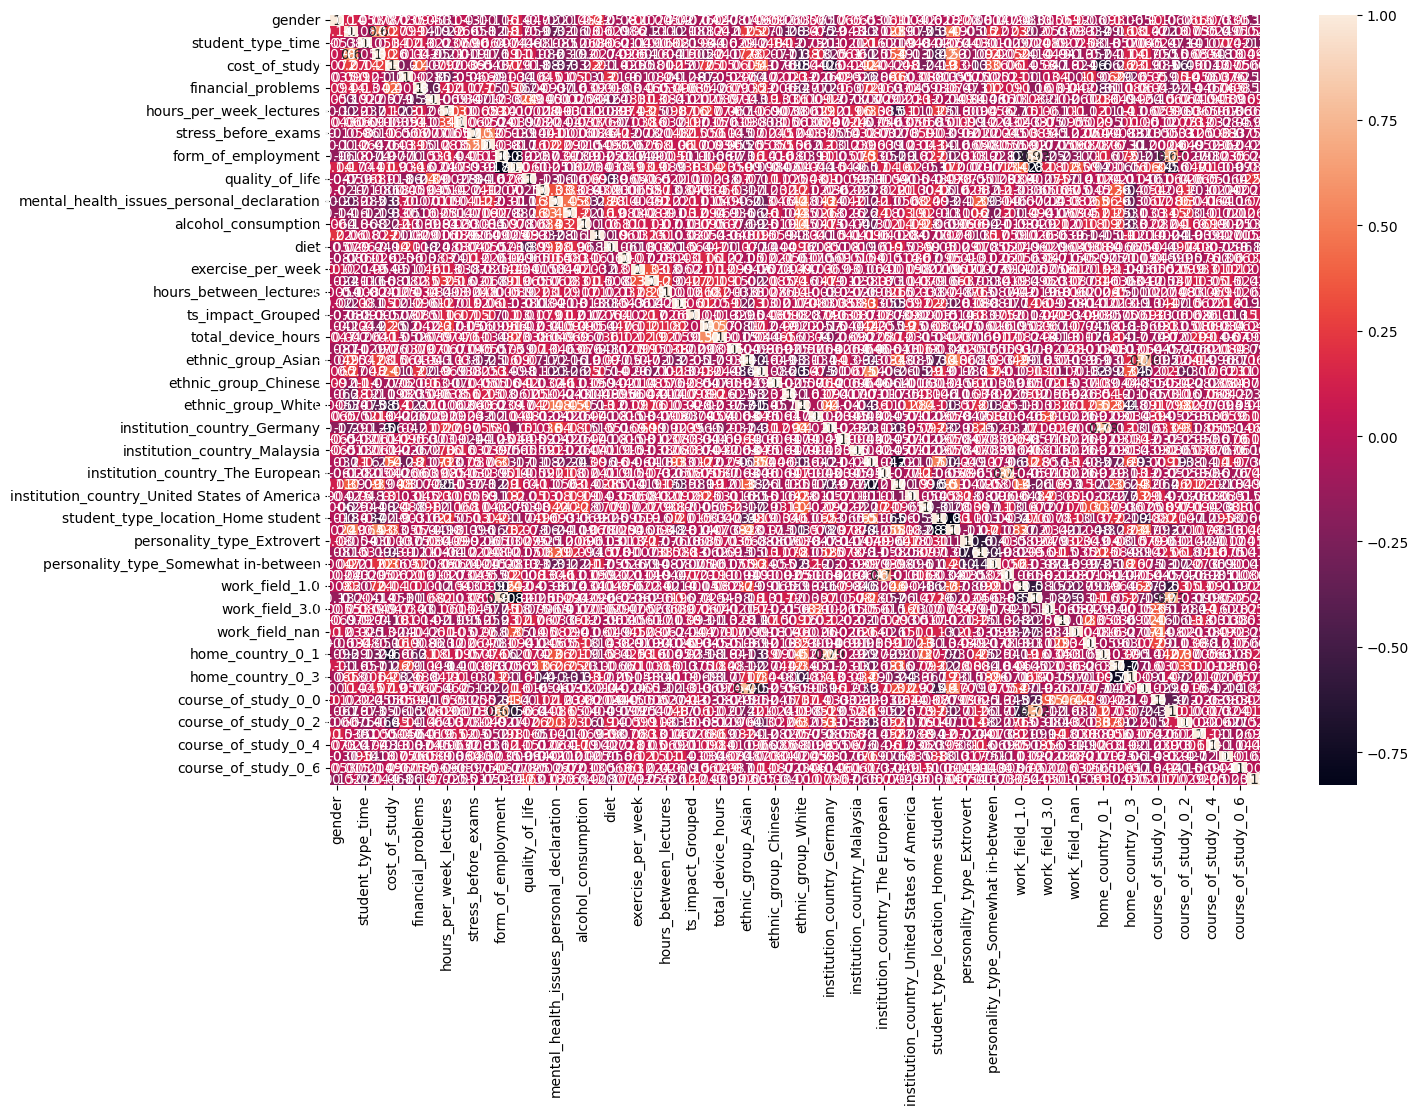

In [106]:
Correlation_Heat_Map(df)

Distribution plots of the features


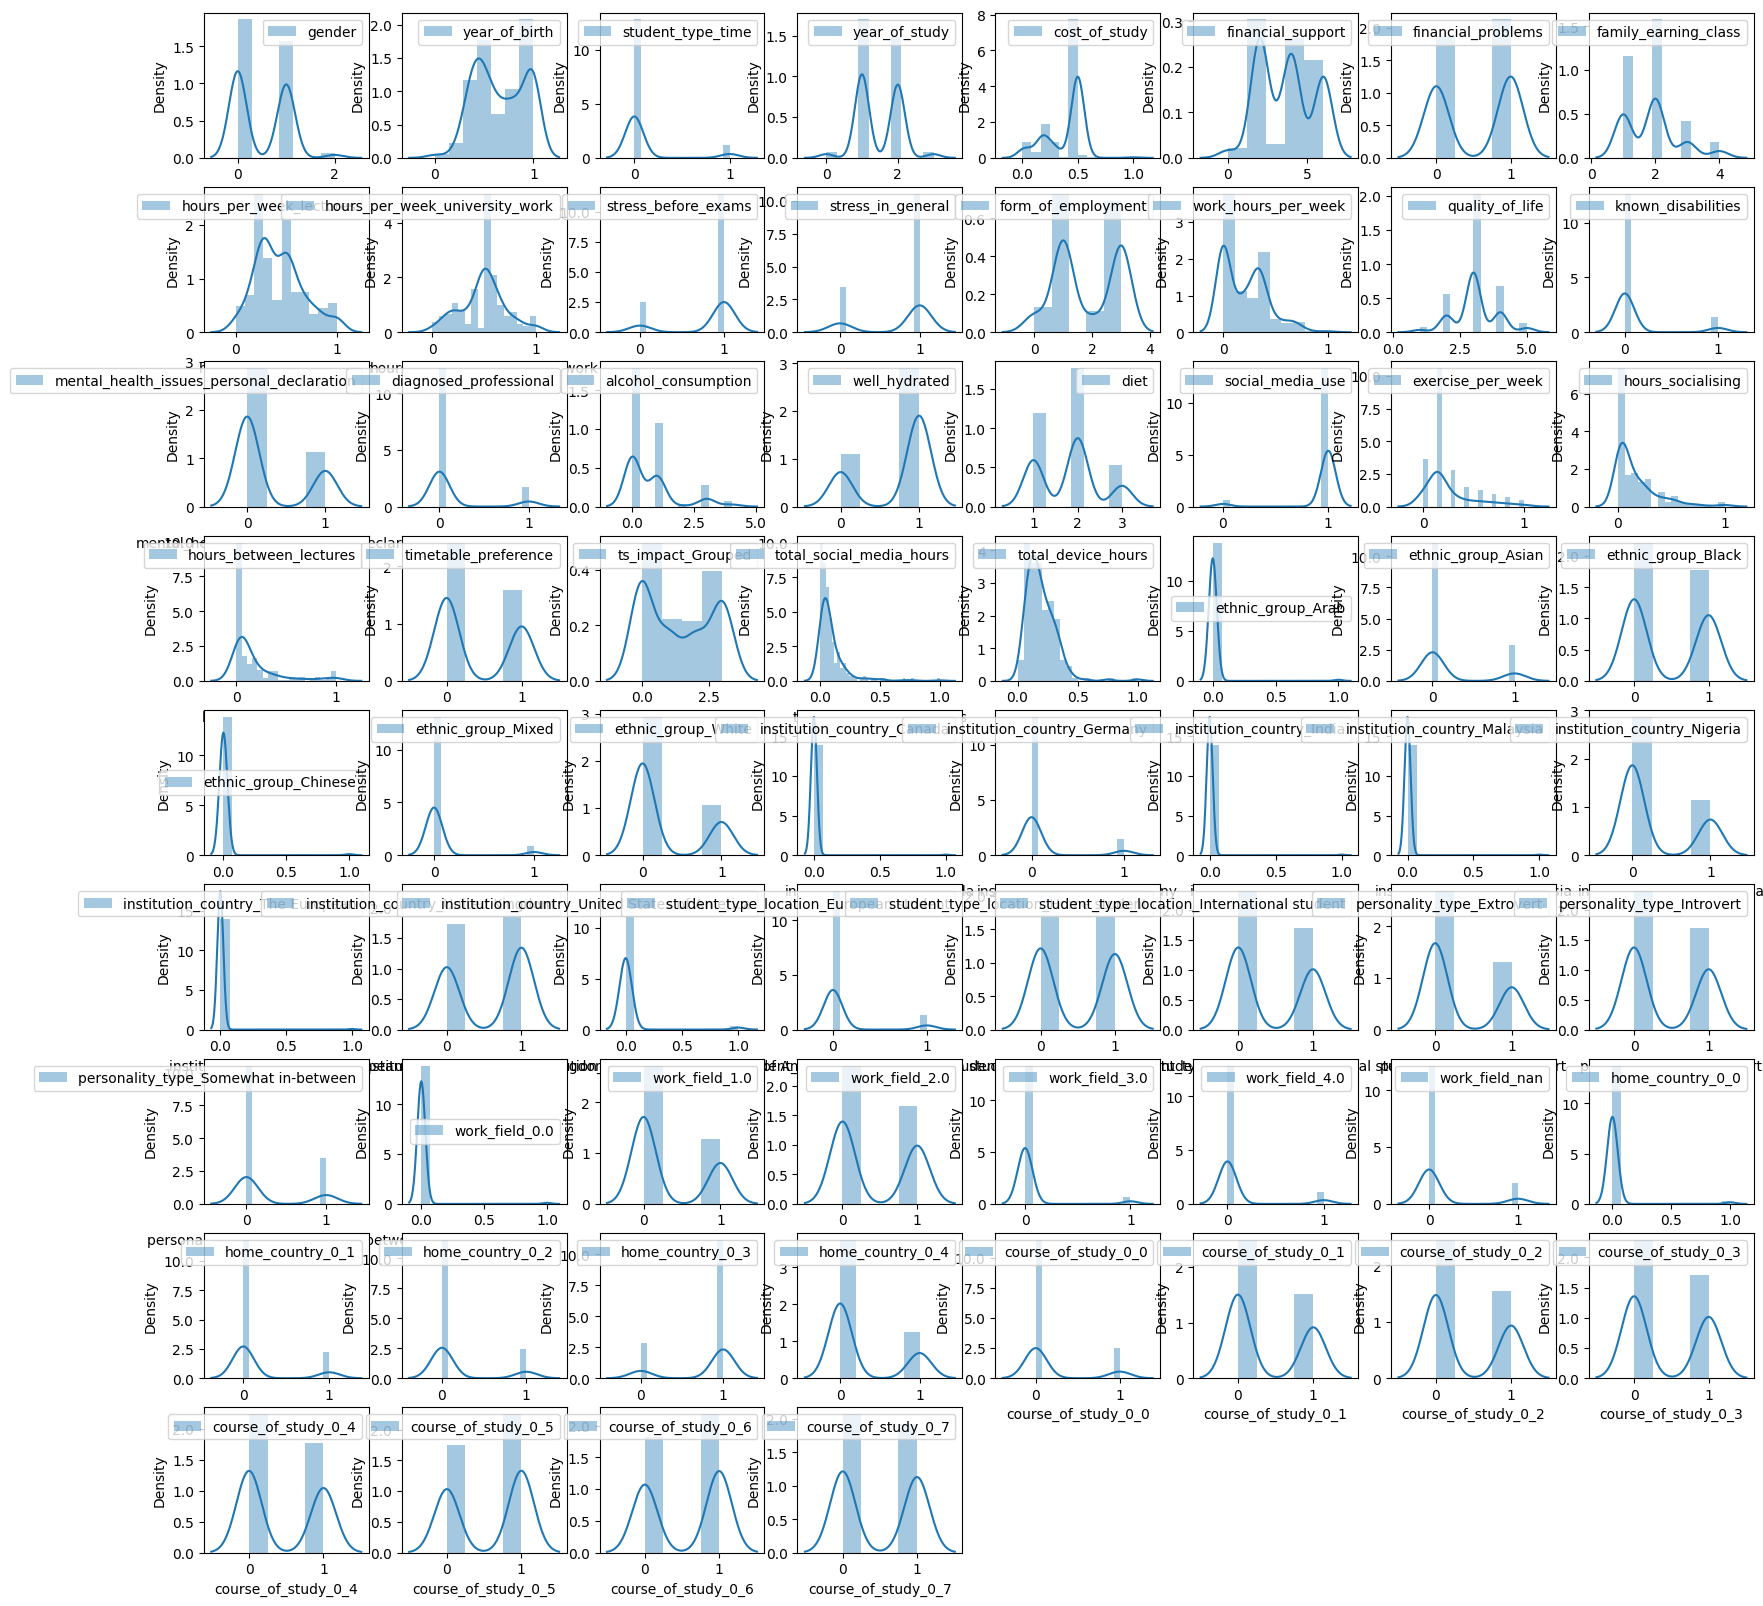

In [120]:
Dist_plots(df,'mental_health_issues_personal_declaration')

Violin plot of each feature


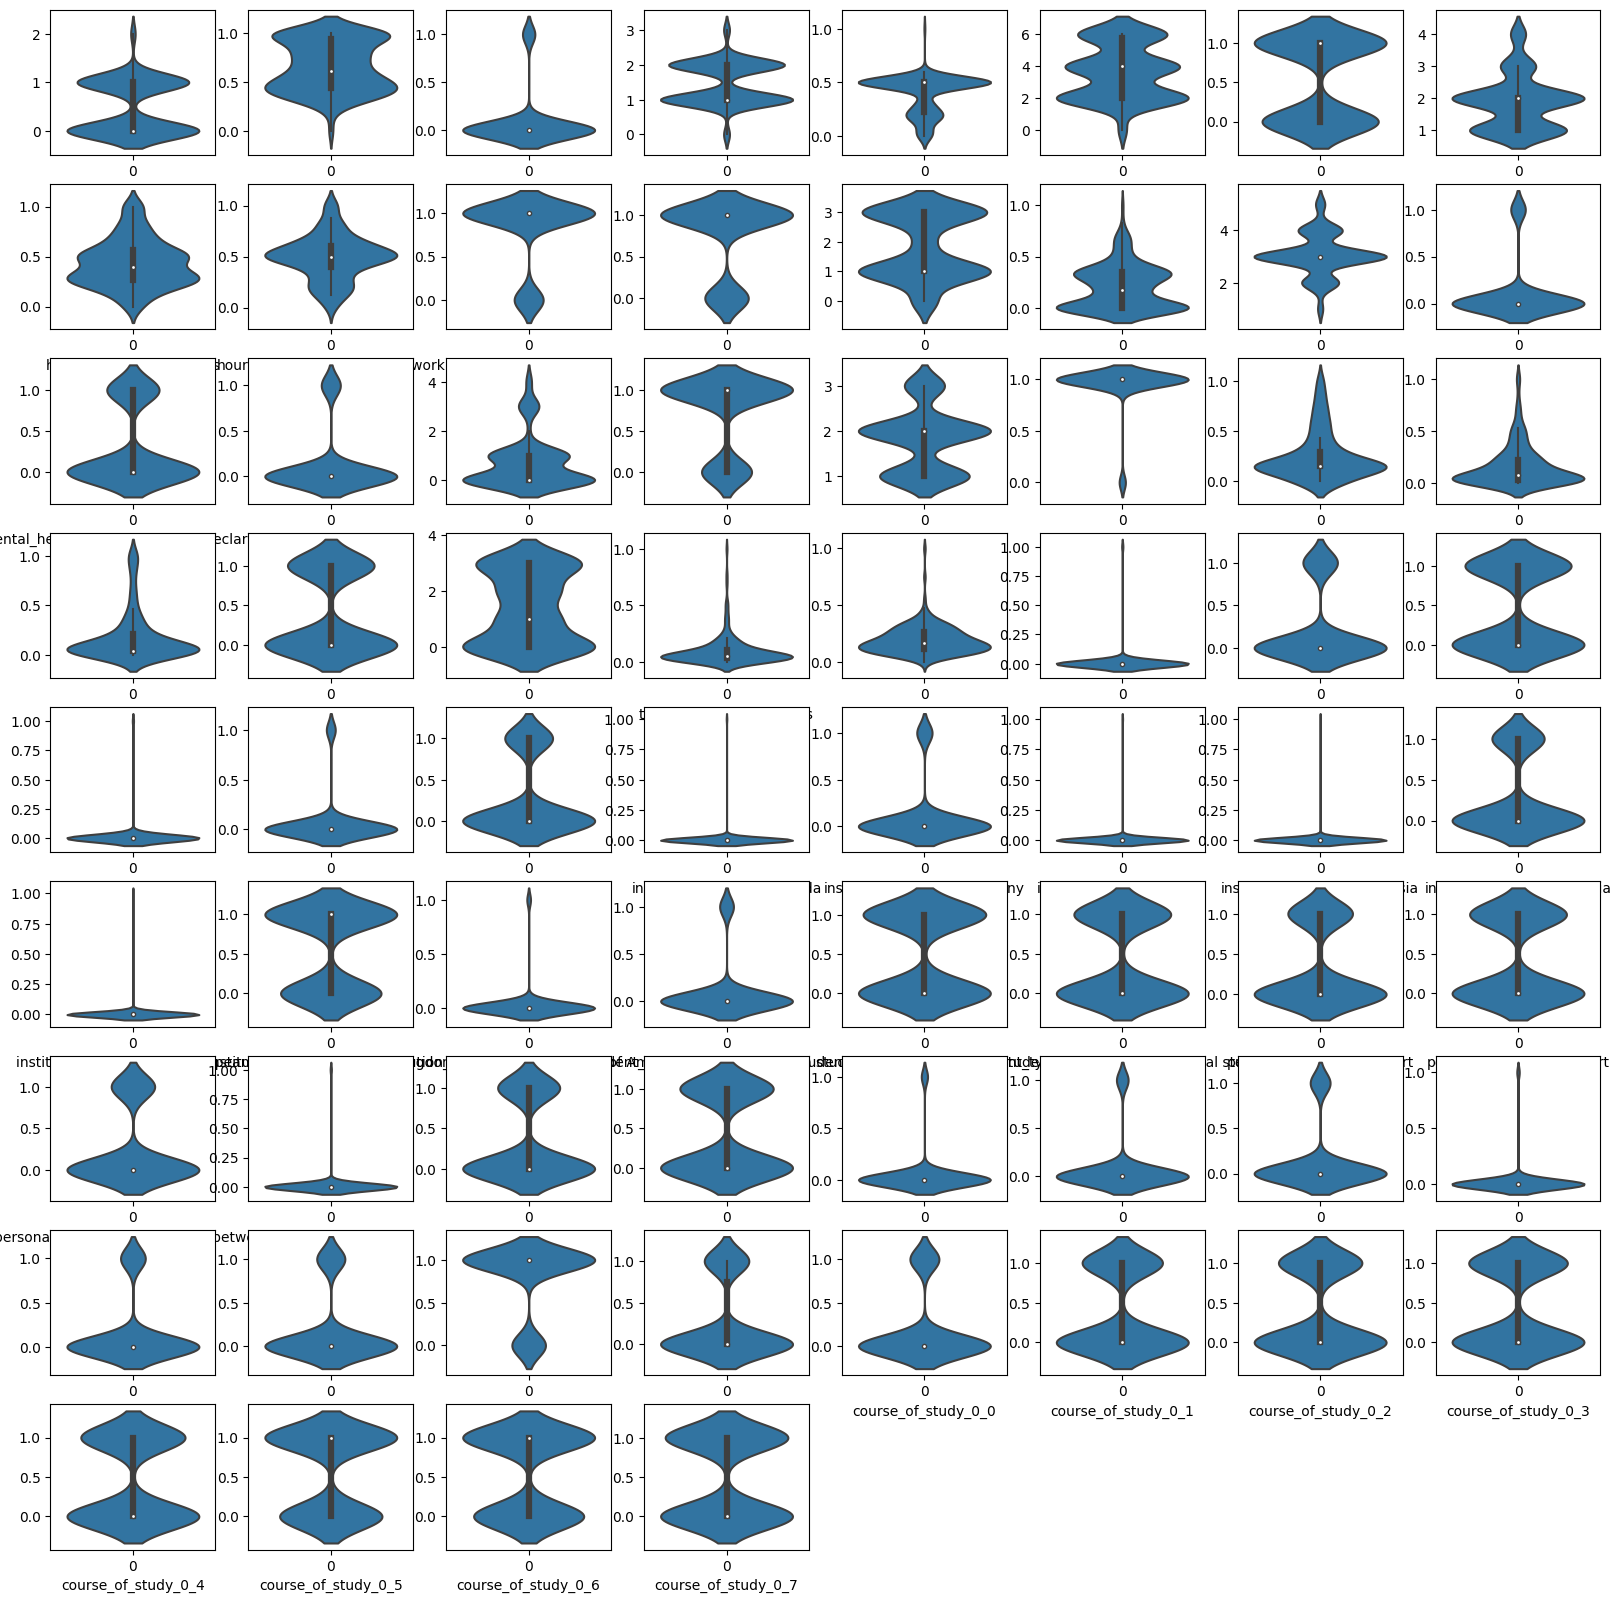

In [122]:
Violin_plot(df)

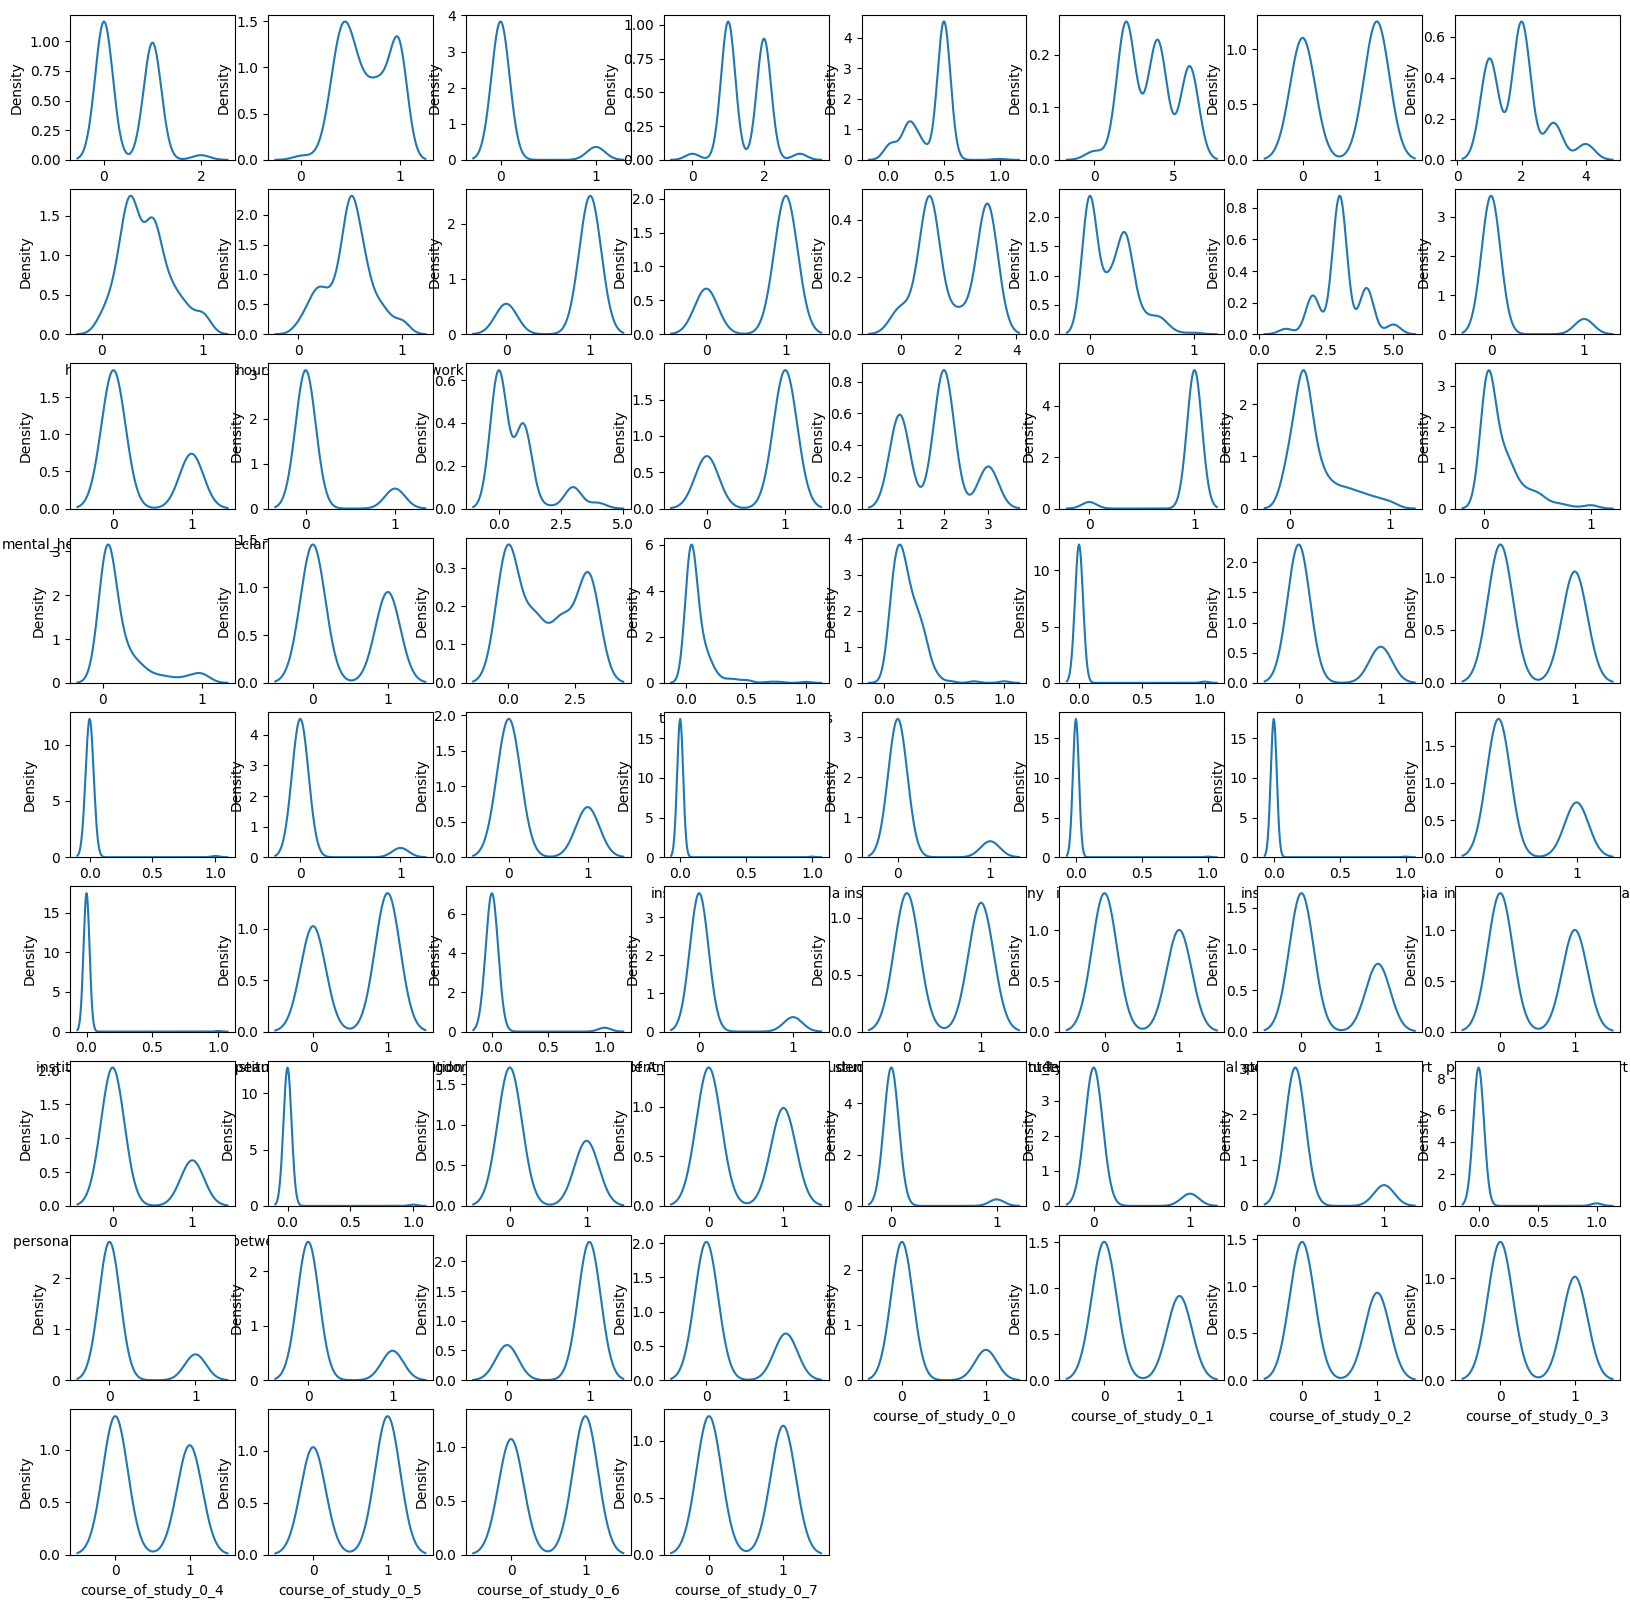

In [123]:
KDE_Plot(df)

Outliers of each feature


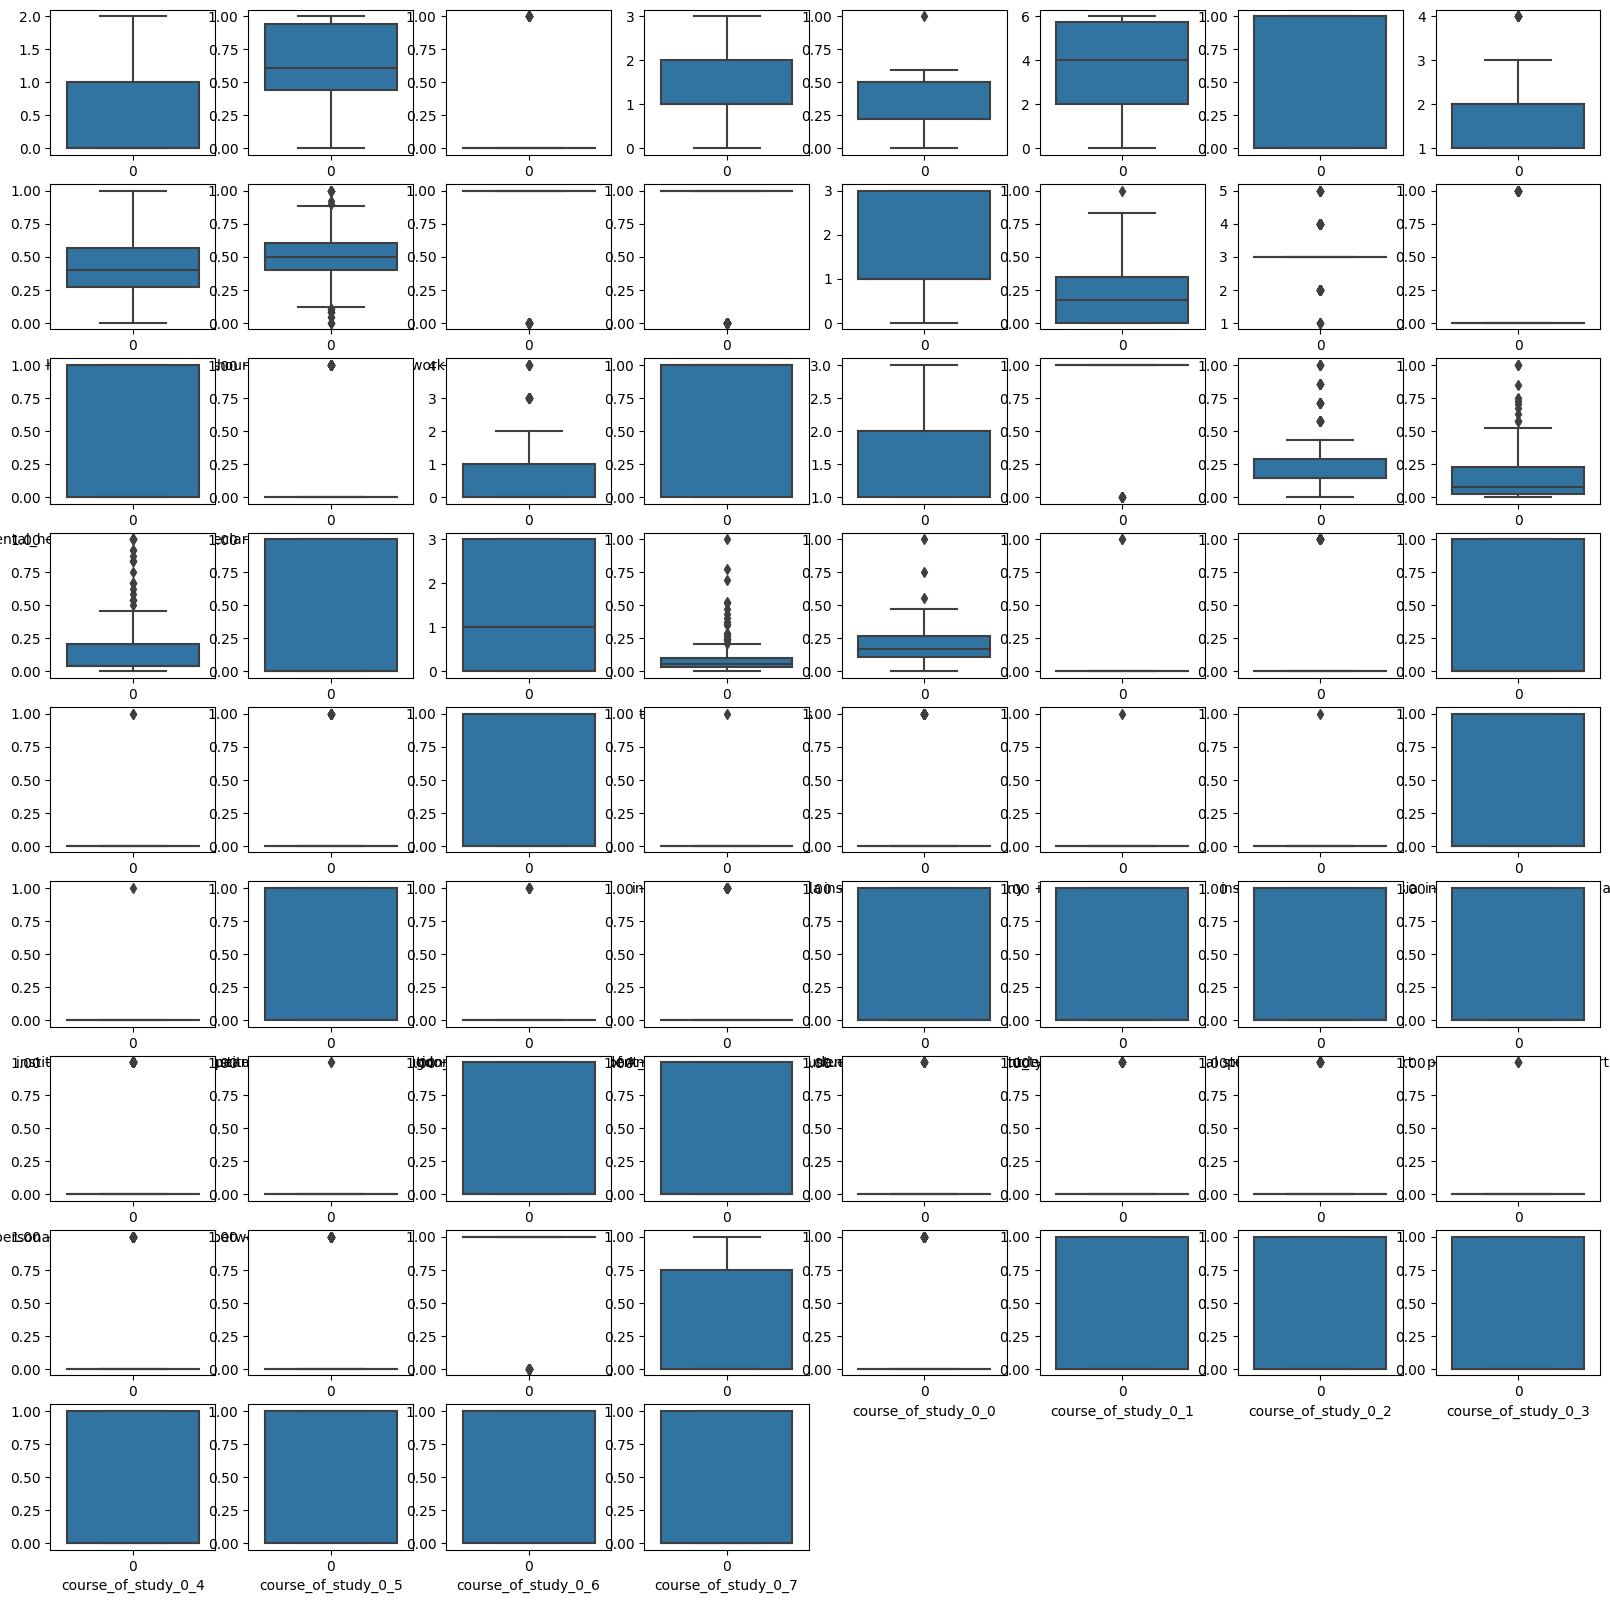

In [124]:
Box_Plot_Outliers(df)

Kurtosis of each feature


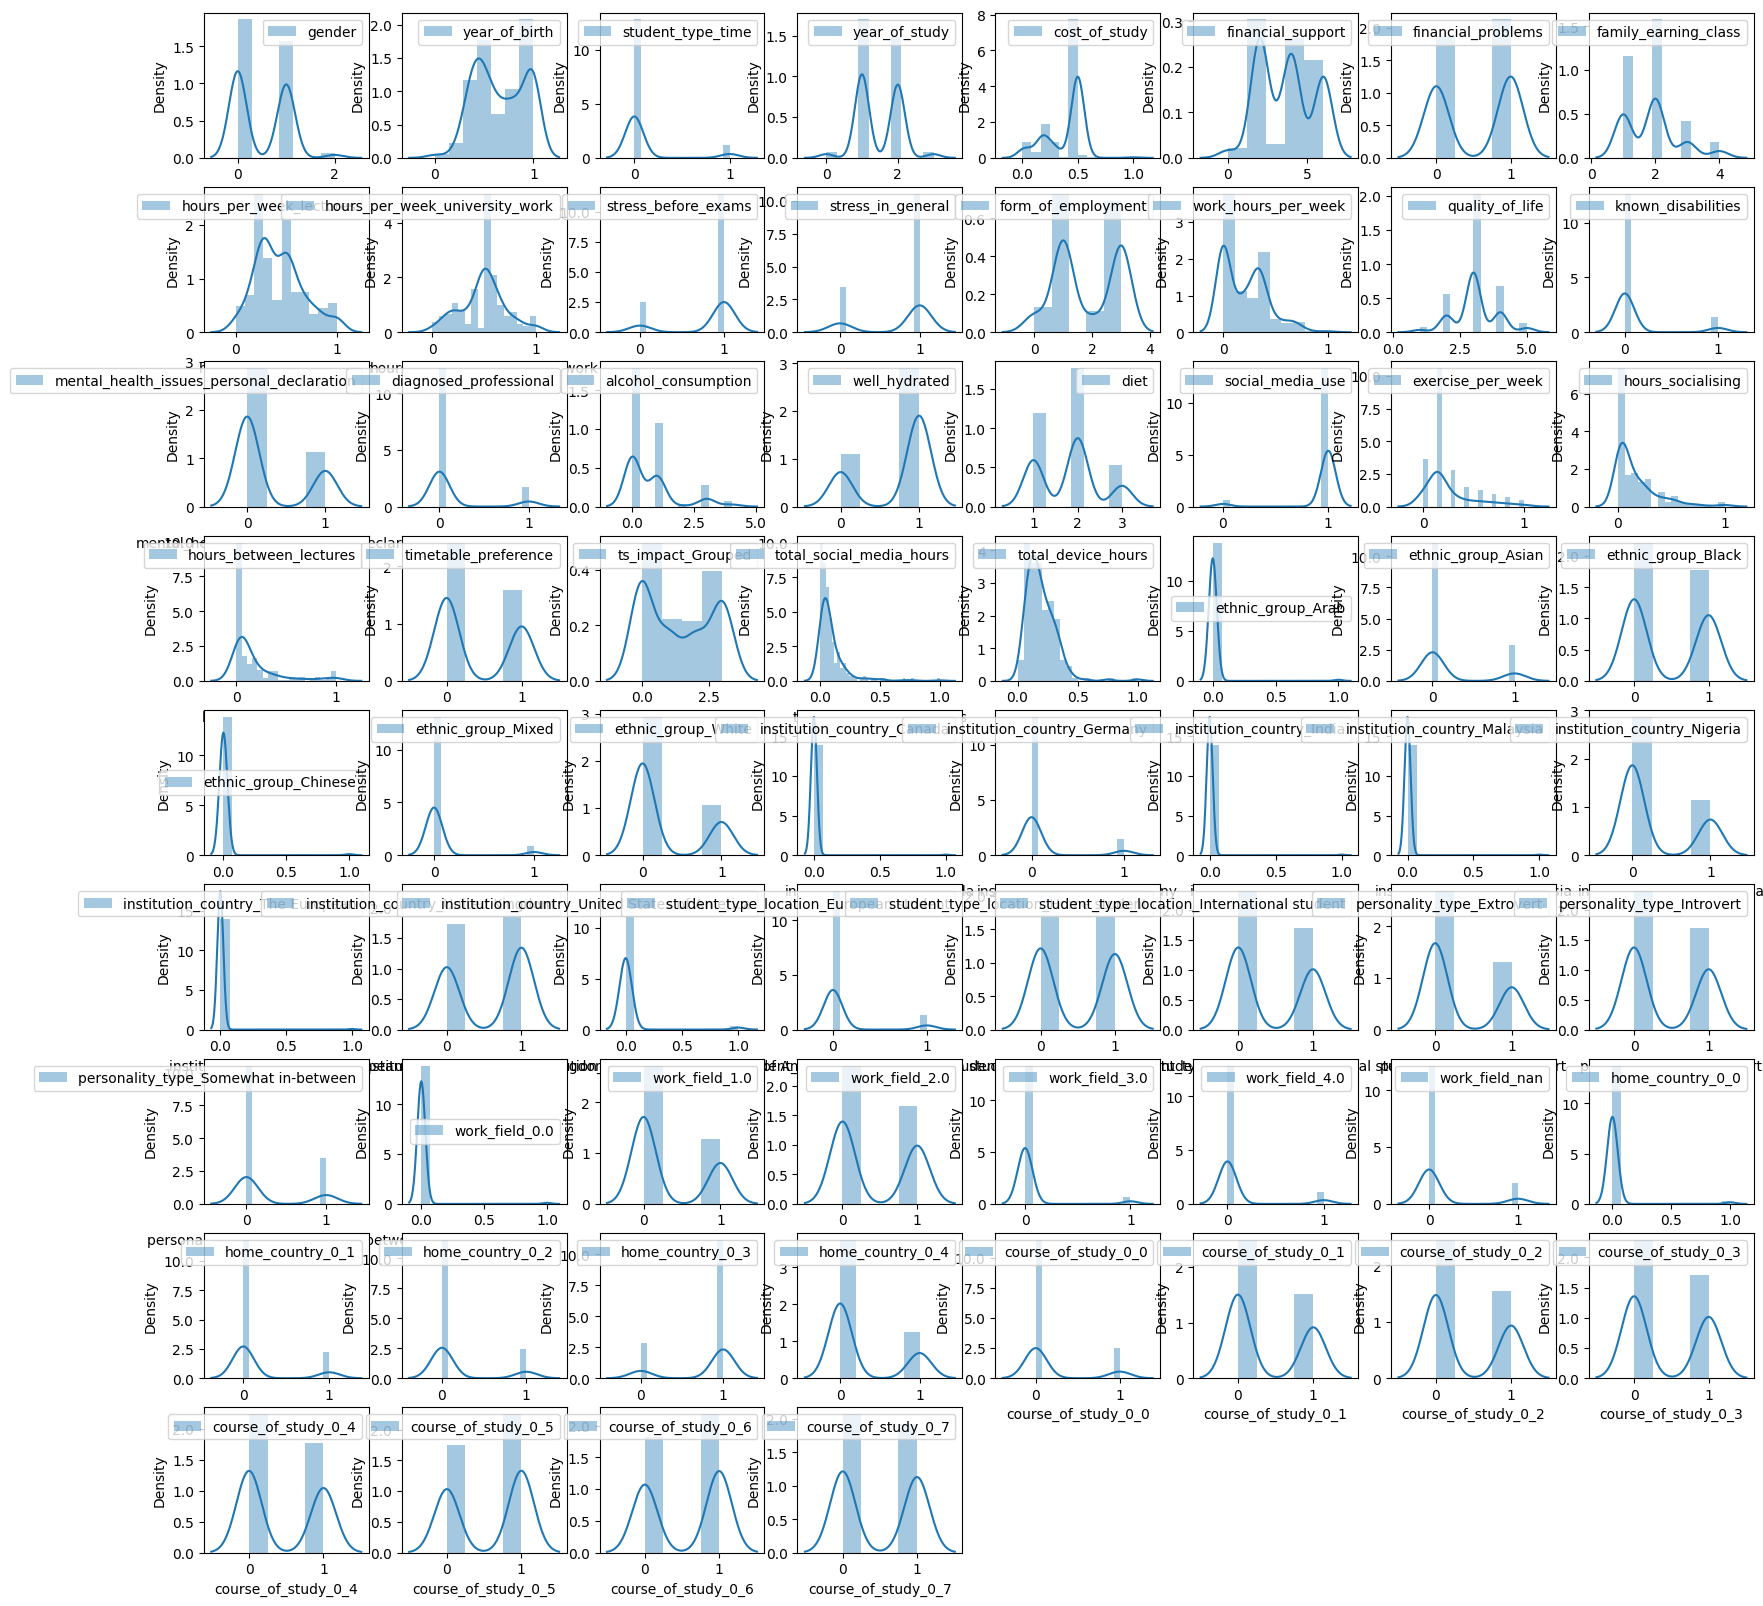

In [125]:
Plot_Kurtosis(df)

In [126]:
Plot_Skewness(df)

Skewness of each feature



Feature  Skewness
0                gender      0.41
1         year_of_birth     -0.02
2     student_type_time      2.98
3         year_of_study      0.12
4         cost_of_study     -0.82
..                  ...       ...
63  course_of_study_0_3      0.29
64  course_of_study_0_4      0.24
65  course_of_study_0_5     -0.26
66  course_of_study_0_6     -0.18
67  course_of_study_0_7      0.07

[68 rows x 2 columns]

In [127]:
descriptive_statistics(df,'mental_health_issues_personal_declaration')

Descriptive statistics by target label
mental_health_issues_personal_declaration      0     1
gender              count                 159.00 63.00
                    mean                    0.55  0.32
                    std                     0.54  0.50
                    min                     0.00  0.00
                    25%                     0.00  0.00
...                                          ...   ...
course_of_study_0_7 min                     0.00  0.00
                    25%                     0.00  0.00
                    50%                     0.00  1.00
                    75%                     1.00  1.00
                    max                     1.00  1.00

[536 rows x 2 columns]



Pie Chart


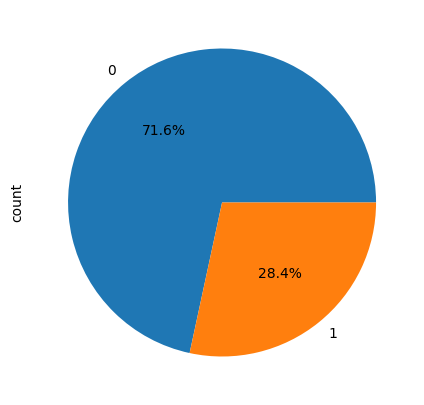

In [128]:
Plot_Pie_Chart(df,'mental_health_issues_personal_declaration')

# v. Data Transformation

### Normalizing the Numerical Features/Columns

In [47]:
# creating a list of all numerical columns to normalize them
Numerical_Columns = df.columns[df.dtypes != 'object']
for col in Numerical_Columns:
    Scaler = MinMaxScaler()
    df[col] = Scaler.fit_transform(df[col].values.reshape(-1,1))
    Scaler_FileName = './Scalers/' + str(col) + '_Scaler.pkl'
    pkl.dump(Scaler, open(Scaler_FileName, 'wb'))
df

home_country ethnic_group  gender  year_of_birth  \
0    United States of America        White  Female           0.56   
1                     Nigeria        Black    Male           0.89   
2                       India        Asian    Male           0.50   
3    United States of America        White    Male           0.44   
4                     Nigeria        Black  Female           1.00   
..                        ...          ...     ...            ...   
218            United Kingdom        Black    Male           1.00   
219            Czech Republic        White  Female           0.50   
220                   Germany        White    Male           1.00   
221            United Kingdom        Black    Male           1.00   
222            United Kingdom        White    Male           0.78   

          institution_country  student_type_location student_type_time  \
0                The European       European student         Full Time   
1              United Kingdom           Home student         Full Time   
2                       India  International student         Full Time   
3    United States of America           Home student         Full Time   
4              United Kingdom  International student         Full Time   
..                        ...                    ...               ...   
218            United Kingdom           Home student         Full Time   
219            United Kingdom       European student         Full Time   
220                   Germany           Home student         Full Time   
221            United Kingdom           Home student         Full Time   
222            United Kingdom           Home student         Full Time   

                                      course_of_study           year_of_study  \
0         Bachelor of Science in Software Engineering  Undergraduate 4th year   
1                                                 Msc   Postgraduate 1st year   
2                                                 BCA   Postgraduate 1st year   
3                                            History.  Undergraduate 2nd year   
4                                 AI and Data science   Postgraduate 1st year   
..                                                ...                     ...   
218                                             maids   Postgraduate 1st year   
219  BA (Hons) Fashion Styling and Creative Direction  Undergraduate 3rd year   
220                       BA Asian Studies (Sinology)  Undergraduate 2nd year   
221                         Applied AI & Data Science   Postgraduate 1st year   
222                                project management   Postgraduate 1st year   

     cost_of_study  ...                diet social_media_use  \
0             0.50  ...  Somewhat Inbetween              Yes   
1             0.50  ...  Somewhat Inbetween              Yes   
2             0.50  ...             Healthy              Yes   
3             0.50  ...             Healthy              Yes   
4             0.50  ...  Somewhat Inbetween              Yes   
..             ...  ...                 ...              ...   
218           0.50  ...             Healthy              Yes   
219           0.18  ...             Healthy              Yes   
220           0.01  ...  Somewhat Inbetween              Yes   
221           0.18  ...             Healthy              Yes   
222           0.08  ...           Unhealthy              Yes   

        personality_type  exercise_per_week  hours_socialising  \
0              Extrovert               0.29               0.38   
1    Somewhat in-between               0.14               0.03   
2              Introvert               0.14               0.12   
3              Extrovert               0.14               0.03   
4              Introvert               0.00               0.00   
..                   ...                ...                ...   
218            Extrovert               0.86               0.15   
219            Extrovert     

### Converting Categorical variables into numeric

In [23]:
# dropping the 'graduate' in year of study as this questionaire was for students
ind = df[df.year_of_study == 'Graduated'].index
df.drop(ind, inplace=True)

In [24]:
# converting the outcome variables into numeric
mental_health_issues_map = {'Yes': 1, 'No': 0}
df['mental_health_issues_personal_declaration'] = df['mental_health_issues_personal_declaration'].map(mental_health_issues_map) 
np.save(os.path.join('./Label Maps/', 'mental_health_issues_map.npy'), mental_health_issues_map)

In [25]:
# converting dichotomous data types into numeric
lbl_cols = ['financial_problems','stress_before_exams','stress_in_general',
            'known_disabilities','well_hydrated','social_media_use','timetable_preference']
for col in lbl_cols:
    LE = LabelEncoder()
    df[col] = LE.fit_transform(df[col])
    LabelEncoder_FileName = './Label Encoders/' + col + '_LabelEncoder.pkl'
    pkl.dump(LE, open(LabelEncoder_FileName, 'wb'))

In [26]:
study_map = {'1 year course' : 0,
'Foundation year' : 0,
'HND' : 0,
'NCE' :0 ,
'Undergraduate 1st year' : 1,
'Undergraduate 2nd year' : 1,
'Undergraduate 3rd year' : 1,
'Undergraduate 4th year' : 1,
'Postgraduate 1st year' : 2,
'Postgraduate 2nd year' : 2,
'PhD 1st year' : 3,
'PhD 2nd year' : 3,
'PhD 3rd year' : 3,
'PhD 4th year' : 3,
'PhD final year' : 3}
df['year_of_study'] = df['year_of_study'].map(study_map) 
np.save(os.path.join('./Label Maps/','year_of_study.npy'), study_map)

In [27]:
earning_map = {'Lower class (below £25,000)' : 1,'Middle class (£25,000-£54,999)' :2,'Higher class (£55,000-£90,000)' :3,
               'Upper higher class (above £90,000)' :4}
df['family_earning_class'] = df['family_earning_class'].map(earning_map)
np.save(os.path.join('./Label Maps/','family_earning_class.npy'), earning_map)

In [28]:
quality_map = { 'Very Low' : 1,'Low' : 2,'Medium' : 3,
               'High' : 4,'Very High' : 5}
df['quality_of_life'] = df['quality_of_life'].map(quality_map)
np.save(os.path.join('./Label Maps/','quality_of_life.npy'), quality_map)

In [29]:
alc_map = {'No Drinks':0 ,
           'Below Moderate':1,
           'Less Moderate':2,
           'Moderate':3,
           'Above Moderate':4,
          }
df['alcohol_consumption'] = df['alcohol_consumption'].map(alc_map)
np.save(os.path.join('./Label Maps/','alcohol_consumption.npy'), alc_map)

In [30]:
diet_map = {'Healthy': 1,'Somewhat Inbetween': 2,
            'Unhealthy' : 3}
df['diet'] = df['diet'].map(diet_map)
np.save(os.path.join('./Label Maps/','diet.npy'), diet_map)

In [31]:
ts_impact_grouped_map = {'No, it has no impact on my study nor life or health.' : 0,'Yes, on my studies.' :1,'Yes, on my life and health.' :2,'Yes, on my life, health and studies.' :3}
df['ts_impact_Grouped'] = df['ts_impact_Grouped'].map(ts_impact_grouped_map)
np.save(os.path.join('./Label Maps/','ts_impact_Grouped.npy'), ts_impact_grouped_map)

In [32]:
work_field_map = {
    'Administrative and secretarial occupations' : 0,
    'Caring, leisure and other service occupations' : 1,
    'Not Applicable' : 2,
    'Professional occupations' : 3,
    'Sales and customer service occupations' : 4,
    'Skilled trade occupations' : 5,
}

df.work_field = df.work_field.map(work_field_map)
np.save(os.path.join('./Label Maps/','work_field.npy'), work_field_map)

In [33]:
one_hot_columns = ["ethnic_group", "institution_country", "student_type_location", "personality_type", "work_field"]
for col in one_hot_columns:
    ohe = OneHotEncoder()
    transformed_data = ohe.fit_transform(np.expand_dims(df[col], axis=1)).toarray()
    for i, category in enumerate(ohe.get_feature_names_out([col])):
        df[category] = transformed_data[:, i]
    
    OneHotEncoder_FileName = './OneHotEncoders/' + col + '_OneHotEncoder.pkl'
    with open(OneHotEncoder_FileName, 'wb') as file:
        pkl.dump(ohe, file)

In [34]:
binary_columns=['home_country', 'course_of_study']
for col in binary_columns:
    be = BinaryEncoder()
    transformed_data = be.fit_transform(np.expand_dims(df[col], axis=1))
    transformed_data=np.array(transformed_data)
    for i, category in enumerate(be.get_feature_names_out([col])):
        df[col+'_'+category] = transformed_data[:, i]
    
    OneHotEncoder_FileName = './BinaryEncoders/' + col + '_BinaryEncoder.pkl'
    with open(OneHotEncoder_FileName, 'wb') as file:
        pkl.dump(ohe, file)

In [35]:
df.drop(columns=binary_columns,inplace=True)
df.drop(columns=one_hot_columns,inplace=True)

In [36]:
df.head()

gender  year_of_birth student_type_time  year_of_study  cost_of_study  \
0  Female             24         Full Time              1          25000   
1    Male             30         Full Time              2          25000   
2    Male             23         Full Time              2          25000   
3    Male             22         Full Time              1          25000   
4  Female             32         Full Time              2          25000   

         financial_support  financial_problems  family_earning_class  \
0  Parent (family) support                   1                     2   
1             Student loan                   1                     2   
2             Student loan                   1                     1   
3                Self-paid                   0                     3   
4  Parent (family) support                   0                     1   

   hours_per_week_lectures  hours_per_week_university_work  ...  \
0                       22                              32  ...   
1                        8                              10  ...   
2                       15                              25  ...   
3                       15                              25  ...   
4                        6                              11  ...   

   home_country_0_3  home_country_0_4 course_of_study_0_0  \
0                 0                 1                   0   
1                 1                 0                   0   
2                 1                 1                   0   
3                 0                 1                   0   
4                 1                 0                   0   

   course_of_study_0_1  course_of_study_0_2  course_of_study_0_3  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   course_of_study_0_4 course_of_study_0_5  course_of_study_0_6  \
0                    0                   0                    0   
1                    0                   0                    1   
2                    0                   0                    1   
3                    0                   1                    0   
4                    0                   1                    0   

   course_of_study_0_7  
0                    1  
1                    0  
2                    1  
3                    0  
4                    1  

[5 rows x 68 columns]

In [37]:
Categorical_Columns = df.select_dtypes(include=['object']).columns
for col in Categorical_Columns:
    LE = LabelEncoder()
    df[col] = LE.fit_transform(df[col])
    LabelEncoder_FileName = './Label Encoders/' + col + '_LabelEncoder.pkl'
    pkl.dump(LE, open(LabelEncoder_FileName, 'wb'))

In [38]:
df = df.dropna()

In [39]:
df.head()

gender  year_of_birth  student_type_time  year_of_study  cost_of_study  \
0       0             24                  0              1          25000   
1       1             30                  0              2          25000   
2       1             23                  0              2          25000   
3       1             22                  0              1          25000   
4       0             32                  0              2          25000   

   financial_support  financial_problems  family_earning_class  \
0                  2                   1                     2   
1                  6                   1                     2   
2                  6                   1                     1   
3                  4                   0                     3   
4                  2                   0                     1   

   hours_per_week_lectures  hours_per_week_university_work  ...  \
0                       22                              32  ...   
1                        8                              10  ...   
2                       15                              25  ...   
3                       15                              25  ...   
4                        6                              11  ...   

   home_country_0_3  home_country_0_4  course_of_study_0_0  \
0                 0                 1                    0   
1                 1                 0                    0   
2                 1                 1                    0   
3                 0                 1                    0   
4                 1                 0                    0   

   course_of_study_0_1  course_of_study_0_2  course_of_study_0_3  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   course_of_study_0_4  course_of_study_0_5  course_of_study_0_6  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    1                    0   
4                    0                    1                    0   

   course_of_study_0_7  
0                    1  
1                    0  
2                    1  
3                    0  
4                    1  

[5 rows x 68 columns]

# vi. Feature Importance and Feature Selection

In [40]:
def Plot_Feature_Importance_to_Target_Label(dataframe,label_name):
    '''Function to plot the feature importance to the target label'''
    print("Feature importance to target label using two methods")
    
    #First Method Random Forest
    print("Random Forest")
    DF_Compare_Random_Forest = pd.DataFrame()
    X = dataframe.drop(label_name,axis=1)
    y = dataframe[label_name]
    model = RandomForestClassifier()
    model.fit(X,y)
    DF_Compare_Random_Forest['Random Forest Importance'] = model.feature_importances_
    DF_Compare_Random_Forest['Random Forest Importance %'] = DF_Compare_Random_Forest['Random Forest Importance']*100

    #Second Method Recursive Feature Elimination
    print("Recursive Feature Elimination")
    DF_Compare_RFE = pd.DataFrame()
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=1, step=1)
    fit = rfe.fit(X, y)
    DF_Compare_RFE['Recursive Feature Elimination Importance'] = fit.ranking_

    DF_Compare_RFE.index = X.columns
    DF_Compare_Random_Forest.index = X.columns

    DF_Compare_Random_Forest = DF_Compare_Random_Forest.sort_values(by='Random Forest Importance %',ascending=False)
    DF_Compare_RFE = DF_Compare_RFE.sort_values(by='Recursive Feature Elimination Importance',ascending=False)

    print("Feature importance to target label using two methods")
    return DF_Compare_Random_Forest,DF_Compare_RFE,

def Drop_Rows_Below_25_Percentile(df,col):
    '''Function to drop rows below 25 percentile'''
    #Get rows that fall in the 25 percentile
    Q1 = df[col].quantile(0.25)
    print('Following columns are being dropped')
    print(df[df[col]<Q1].sort_values(by=col,ascending=False))
    print()
    Temp = df[df[col]>=Q1]
    return Temp

In [41]:
DF_Compare_Random_Forest,DF_Compare_RFE = Plot_Feature_Importance_to_Target_Label(df,'mental_health_issues_personal_declaration')

Feature importance to target label using two methods
Random Forest
Recursive Feature Elimination
Feature importance to target label using two methods


In [42]:
DF_Compare_Random_Forest

Random Forest Importance  \
cost_of_study                                         0.08   
ethnic_group_White                                    0.06   
hours_per_week_university_work                        0.05   
diagnosed_professional                                0.05   
year_of_birth                                         0.05   
...                                                    ...   
institution_country_The European                      0.00   
work_field_0.0                                        0.00   
home_country_0_0                                      0.00   
institution_country_Canada                            0.00   
institution_country_India                             0.00   

                                  Random Forest Importance %  
cost_of_study                                           7.61  
ethnic_group_White                                      5.64  
hours_per_week_university_work                          5.28  
diagnosed_professional                                  5.27  
year_of_birth                                           4.56  
...                                                      ...  
institution_country_The European                        0.06  
work_field_0.0                                          0.06  
home_country_0_0                                        0.05  
institution_country_Canada                              0.00  
institution_country_India                               0.00  

[67 rows x 2 columns]

In [43]:
DF_Compare_RFE

Recursive Feature Elimination Importance
institution_country_Canada                                            67
institution_country_India                                             66
work_field_0.0                                                        65
ethnic_group_Arab                                                     64
ethnic_group_Chinese                                                  63
...                                                                  ...
ethnic_group_White                                                     5
year_of_birth                                                          4
total_device_hours                                                     3
hours_per_week_university_work                                         2
cost_of_study                                                          1

[67 rows x 1 columns]

In [44]:
'''
Note the ordering/sorting of the column Recursive Feature Elimination Importance will be affected in this dataframe
because the indexes have to match, for this the sorting will be affected.
'''
DF_Collective = pd.concat([DF_Compare_Random_Forest, DF_Compare_RFE], axis=1)
DF_Collective

Random Forest Importance  \
cost_of_study                                         0.08   
ethnic_group_White                                    0.06   
hours_per_week_university_work                        0.05   
diagnosed_professional                                0.05   
year_of_birth                                         0.05   
...                                                    ...   
institution_country_The European                      0.00   
work_field_0.0                                        0.00   
home_country_0_0                                      0.00   
institution_country_Canada                            0.00   
institution_country_India                             0.00   

                                  Random Forest Importance %  \
cost_of_study                                           7.61   
ethnic_group_White                                      5.64   
hours_per_week_university_work                          5.28   
diagnosed_professional                                  5.27   
year_of_birth                                           4.56   
...                                                      ...   
institution_country_The European                        0.06   
work_field_0.0                                          0.06   
home_country_0_0                                        0.05   
institution_country_Canada                              0.00   
institution_country_India                               0.00   

                                  Recursive Feature Elimination Importance  
cost_of_study                                                            1  
ethnic_group_White                                                       5  
hours_per_week_university_work                                           2  
diagnosed_professional                                                   8  
year_of_birth                                                            4  
...                                                                    ...  
institution_country_The European                                        59  
work_field_0.0                                                          65  
home_country_0_0                                                        62  
institution_country_Canada                                              67  
institution_country_India                                               66  

[67 rows x 3 columns]

In [45]:
np.sum(DF_Compare_Random_Forest['Random Forest Importance'])

1.0

In [46]:
DF_Compare_Random_Forest = Drop_Rows_Below_25_Percentile(DF_Compare_Random_Forest, 'Random Forest Importance %')
len(DF_Compare_Random_Forest),DF_Compare_Random_Forest

Following columns are being dropped
                                              Random Forest Importance  \
work_field_4.0                                                    0.00   
student_type_location_Home student                                0.00   
social_media_use                                                  0.00   
ethnic_group_Mixed                                                0.00   
work_field_2.0                                                    0.00   
institution_country_United States of America                      0.00   
stress_before_exams                                               0.00   
work_field_3.0                                                    0.00   
student_type_time                                                 0.00   
institution_country_Malaysia                                      0.00   
ethnic_group_Chinese                                              0.00   
ethnic_group_Arab                                                 0.00   
in

(50,
                                              Random Forest Importance  \
 cost_of_study                                                    0.08   
 ethnic_group_White                                               0.06   
 hours_per_week_university_work                                   0.05   
 diagnosed_professional                                           0.05   
 year_of_birth                                                    0.05   
 personality_type_Introvert                                       0.04   
 hours_per_week_lectures                                          0.04   
 total_device_hours                                               0.04   
 alcohol_consumption                                              0.03   
 total_social_media_hours                                         0.03   
 hours_socialising                                                0.03   
 quality_of_life                                                  0.02   
 course_of_study_0_2             

In [47]:
Feature_Selected_Columns = list(DF_Compare_Random_Forest.index)
Feature_Selected_Columns.append('mental_health_issues_personal_declaration')
len(Feature_Selected_Columns),Feature_Selected_Columns

(51,
 ['cost_of_study',
  'ethnic_group_White',
  'hours_per_week_university_work',
  'diagnosed_professional',
  'year_of_birth',
  'personality_type_Introvert',
  'hours_per_week_lectures',
  'total_device_hours',
  'alcohol_consumption',
  'total_social_media_hours',
  'hours_socialising',
  'quality_of_life',
  'course_of_study_0_2',
  'diet',
  'hours_between_lectures',
  'home_country_0_1',
  'work_hours_per_week',
  'known_disabilities',
  'family_earning_class',
  'home_country_0_3',
  'institution_country_Germany',
  'exercise_per_week',
  'ethnic_group_Black',
  'well_hydrated',
  'gender',
  'personality_type_Somewhat in-between',
  'form_of_employment',
  'financial_support',
  'course_of_study_0_3',
  'ts_impact_Grouped',
  'course_of_study_0_6',
  'personality_type_Extrovert',
  'stress_in_general',
  'year_of_study',
  'student_type_location_International student',
  'course_of_study_0_4',
  'course_of_study_0_7',
  'ethnic_group_Asian',
  'financial_problems',
  'instit

In [48]:
df = df[ ['cost_of_study',
  'diagnosed_professional',
  'ethnic_group_White',
  'hours_per_week_university_work',
  'hours_per_week_lectures',
  'personality_type_Introvert',
  'year_of_birth',
  'alcohol_consumption',
  'total_social_media_hours',
  'home_country_0_1',
  'hours_socialising',
  'total_device_hours',
  'known_disabilities',
  'hours_between_lectures',
  'work_hours_per_week',
  'quality_of_life',
  'diet',
  'well_hydrated',
  'exercise_per_week',
  'home_country_0_3',
  'course_of_study_0_2',
  'gender',
  'ts_impact_Grouped',
  'financial_support',
  'institution_country_Germany',
  'stress_in_general',
  'personality_type_Somewhat in-between',
  'year_of_study',
  'ethnic_group_Black',
  'family_earning_class',
  'form_of_employment',
  'student_type_location_International student',
  'course_of_study_0_4',
  'course_of_study_0_3',
  'personality_type_Extrovert',
  'course_of_study_0_7',
  'course_of_study_0_0',
  'timetable_preference',
  'course_of_study_0_6',
  'financial_problems',
  'work_field_nan',
  'home_country_0_2',
  'institution_country_Nigeria',
  'ethnic_group_Asian',
  'course_of_study_0_5',
  'student_type_location_Home student',
  'student_type_location_European student',
  'stress_before_exams',
  'institution_country_United Kingdom',
  'work_field_1.0',
  'mental_health_issues_personal_declaration']]

# vii. Classification Modelling and Evaluation

In [49]:
X = df.drop('mental_health_issues_personal_declaration',axis=1)
y = df['mental_health_issues_personal_declaration']

In [50]:
# #Keeping only those columns which are in the "fresh data" which will be used for the inference
# X = X.drop([
#     'diagnosed_professional',
#     'hours_between_lectures',
#     'hours_per_week_lectures',
#     'hours_socialising',
#     'gender',
#     'work_field',
# ],axis=1)

In [51]:
for x in X.columns:
    print(x)

cost_of_study
diagnosed_professional
ethnic_group_White
hours_per_week_university_work
hours_per_week_lectures
personality_type_Introvert
year_of_birth
alcohol_consumption
total_social_media_hours
home_country_0_1
hours_socialising
total_device_hours
known_disabilities
hours_between_lectures
work_hours_per_week
quality_of_life
diet
well_hydrated
exercise_per_week
home_country_0_3
course_of_study_0_2
gender
ts_impact_Grouped
financial_support
institution_country_Germany
stress_in_general
personality_type_Somewhat in-between
year_of_study
ethnic_group_Black
family_earning_class
form_of_employment
student_type_location_International student
course_of_study_0_4
course_of_study_0_3
personality_type_Extrovert
course_of_study_0_7
course_of_study_0_0
timetable_preference
course_of_study_0_6
financial_problems
work_field_nan
home_country_0_2
institution_country_Nigeria
ethnic_group_Asian
course_of_study_0_5
student_type_location_Home student
student_type_location_European student
stress_before_

In [52]:
X

cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       1                1.00   
1            25000                       0                0.00   
2            25000                       0                0.00   
3            25000                       0                1.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
218          25000                       0                0.00   
219           9031                       1                1.00   
220            564                       0                1.00   
221           8817                       0                0.00   
222           3887                       1                1.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                32                       22   
1                                10                        8   
2                                25                       15   
3                                25                       15   
4                                11                        6   
..                              ...                      ...   
218                              31                        8   
219                              30                        7   
220                              21                       18   
221                              35                       15   
222                               0                        0   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             24                    1   
1                          0.00             30                    0   
2                          1.00             23                    0   
3                          0.00             22                    1   
4                          1.00             32                    0   
..                          ...            ...                  ...   
218                        0.00             32                    0   
219                        0.00             23                    3   
220                        1.00             32                    1   
221                        0.00             32                    0   
222                        1.00             28                    0   

     total_social_media_hours  home_country_0_1  ...  work_field_nan  \
0                          19                 0  ...            0.00   
1                           4                 0  ...            0.00   
2                           1                 0  ...            0.00   
3                           4                 0  ...            0.00   
4                           7                 0  ...            0.00   
..                        ...               ...  ...             ...   
218                         1                 0  ...            1.00   
219                         4                 0  ...            1.00   
220                         2                 1  ...            1.00   
221                         2                 0  ...            1.00   
222                        10                 0  ...            1.00   

     home_country_0_2  institution_country_Nigeria  ethnic_group_Asian  \
0                   0                         0.00                0.00   
1                   0                         0.00                0.00   
2                   0                         0.00                1.00   
3                   0                         0.00                0.00   
4                   0                         0.00                0.00   
..                ...                          ...                 ...   
218                 1                         0.00                0.00   
219                 0                         0.00                0.00   
220                 0                         0.00         

In [53]:
#Keeping a copy of the dataframe for later use
RawDF = df.copy(deep=True)
RawDF

cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       1                1.00   
1            25000                       0                0.00   
2            25000                       0                0.00   
3            25000                       0                1.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
218          25000                       0                0.00   
219           9031                       1                1.00   
220            564                       0                1.00   
221           8817                       0                0.00   
222           3887                       1                1.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                32                       22   
1                                10                        8   
2                                25                       15   
3                                25                       15   
4                                11                        6   
..                              ...                      ...   
218                              31                        8   
219                              30                        7   
220                              21                       18   
221                              35                       15   
222                               0                        0   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             24                    1   
1                          0.00             30                    0   
2                          1.00             23                    0   
3                          0.00             22                    1   
4                          1.00             32                    0   
..                          ...            ...                  ...   
218                        0.00             32                    0   
219                        0.00             23                    3   
220                        1.00             32                    1   
221                        0.00             32                    0   
222                        1.00             28                    0   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                          19                 0  ...                 0   
1                           4                 0  ...                 0   
2                           1                 0  ...                 0   
3                           4                 0  ...                 0   
4                           7                 0  ...                 0   
..                        ...               ...  ...               ...   
218                         1                 0  ...                 1   
219                         4                 0  ...                 0   
220                         2                 1  ...                 0   
221                         2                 0  ...                 1   
222                        10                 0  ...                 1   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           0.00                0.00                    0   
1                           0.00                0.00                    0   
2                           0.00                1.00                    0   
3                           0.00                0.00                    1   
4                           0.00                0.00                    1   
..                           ...                 ...                  ...   
218                         0.00                0.00                    0   
219                         0.00                0.00                    0   
220     

### Functions that will be used multiple times in different sections

In [54]:
def Evaluate_Dataset_Using_LazyClassifier(xtrain, xtest, ytrain, ytest):
    '''Function to evaluate the dataset using LazyClassifier, which evaluates on 29 different models'''
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(xtrain, xtest, ytrain, ytest)
    return models

In [55]:
def Oversample_Using_SMOTE(xtrain,ytrain):
    '''Function to oversample the given dataset using SMOTE'''
    sm = SMOTE(random_state=42)
    xtrain_res, ytrain_res = sm.fit_resample(xtrain, ytrain)
    return xtrain_res, ytrain_res

def OverSample_DF(df):
    '''Function to split dataframe into traina and test, and oversample the train dataset only'''
    train_df,test_df = train_test_split(df,test_size=0.15,random_state=42)
    Train_X,Train_Y = train_df.drop('mental_health_issues_personal_declaration',axis=1),train_df['mental_health_issues_personal_declaration']
    SMOTE_Train_X, SMOTE_Train_Y = Oversample_Using_SMOTE(Train_X,Train_Y)
    Test_X_Not_SMOTE, Test_Y_Not_SMOTE = test_df.drop('mental_health_issues_personal_declaration',axis=1),test_df['mental_health_issues_personal_declaration']
    return SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE

def Get_Data_Train_Test_Splits(df):
    xtrain,xtest,ytrain,ytest = train_test_split(df.drop('mental_health_issues_personal_declaration',axis=1),df['mental_health_issues_personal_declaration'],test_size=0.15,random_state=42)
    return xtrain,xtest,ytrain,ytest

### Comparison of Non-SMOTE and SMOTE dataset's performance

In [56]:
print('DataFrame before SMOTE')
print('Label value counts before SMOTE')
print(RawDF['mental_health_issues_personal_declaration'].value_counts())
RawDF

DataFrame before SMOTE
Label value counts before SMOTE
mental_health_issues_personal_declaration
0    159
1     63
Name: count, dtype: int64


cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       1                1.00   
1            25000                       0                0.00   
2            25000                       0                0.00   
3            25000                       0                1.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
218          25000                       0                0.00   
219           9031                       1                1.00   
220            564                       0                1.00   
221           8817                       0                0.00   
222           3887                       1                1.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                32                       22   
1                                10                        8   
2                                25                       15   
3                                25                       15   
4                                11                        6   
..                              ...                      ...   
218                              31                        8   
219                              30                        7   
220                              21                       18   
221                              35                       15   
222                               0                        0   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             24                    1   
1                          0.00             30                    0   
2                          1.00             23                    0   
3                          0.00             22                    1   
4                          1.00             32                    0   
..                          ...            ...                  ...   
218                        0.00             32                    0   
219                        0.00             23                    3   
220                        1.00             32                    1   
221                        0.00             32                    0   
222                        1.00             28                    0   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                          19                 0  ...                 0   
1                           4                 0  ...                 0   
2                           1                 0  ...                 0   
3                           4                 0  ...                 0   
4                           7                 0  ...                 0   
..                        ...               ...  ...               ...   
218                         1                 0  ...                 1   
219                         4                 0  ...                 0   
220                         2                 1  ...                 0   
221                         2                 0  ...                 1   
222                        10                 0  ...                 1   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           0.00                0.00                    0   
1                           0.00                0.00                    0   
2                           0.00                1.00                    0   
3                           0.00                0.00                    1   
4                           0.00                0.00                    1   
..                           ...                 ...                  ...   
218                         0.00                0.00                    0   
219                         0.00                0.00                    0   
220     

In [57]:
# Splitting the dataframe into train and test, and oversampling the train dataset only
SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE = OverSample_DF(RawDF.copy(deep=True))
Smote_Train_DF = pd.concat([SMOTE_Train_X,SMOTE_Train_Y],axis=1)

print('Train DataFrame after SMOTE on Train')
print('Label value counts after SMOTE')
print(Smote_Train_DF['mental_health_issues_personal_declaration'].value_counts())

Smote_Train_DF

Train DataFrame after SMOTE on Train
Label value counts after SMOTE
mental_health_issues_personal_declaration
0    134
1    134
Name: count, dtype: int64


cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       0                0.00   
1              383                       1                1.00   
2             9323                       0                1.00   
3            25000                       0                0.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
263           9034                       0                0.33   
264          15823                       0                0.24   
265          25000                       0                0.00   
266            596                       1                0.73   
267          11045                       1                0.37   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                40                       25   
1                                40                       25   
2                                20                       10   
3                                34                       25   
4                                27                       11   
..                              ...                      ...   
263                              19                        7   
264                              34                        6   
265                              44                       17   
266                              29                       15   
267                              19                       15   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             22                    0   
1                          0.00             21                    1   
2                          1.00             24                    3   
3                          0.00             27                    0   
4                          0.00             27                    1   
..                          ...            ...                  ...   
263                        0.00             29                    1   
264                        1.00             29                    0   
265                        1.00             22                    0   
266                        1.00             21                    3   
267                        1.00             29                    1   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                           9                 0  ...                 0   
1                           6                 1  ...                 0   
2                           4                 0  ...                 0   
3                           9                 0  ...                 0   
4                           3                 0  ...                 0   
..                        ...               ...  ...               ...   
263                         4                 0  ...                 0   
264                         4                 0  ...                 0   
265                        13                 0  ...                 0   
266                         4                 1  ...                 0   
267                         4                 0  ...                 1   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           1.00                0.00                    1   
1                           0.00                0.00                    0   
2                           0.00                0.00                    1   
3                           1.00                0.00                    1   
4                           0.00                0.00                    0   
..                           ...                 ...                  ...   
263                         0.00                0.00                    0   
264                         0.00                0.00                    0   
265     

In [58]:
Test_DF = pd.concat([Test_X_Not_SMOTE,Test_Y_Not_SMOTE],axis=1)
SMOTE_DF =pd.concat([Smote_Train_DF,Test_DF])

print('Train and Test combined DataFrame after SMOTE on Train')
print('Label value counts after SMOTE')
print(SMOTE_DF['mental_health_issues_personal_declaration'].value_counts())

SMOTE_DF

Train and Test combined DataFrame after SMOTE on Train
Label value counts after SMOTE
mental_health_issues_personal_declaration
0    159
1    143
Name: count, dtype: int64


cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       0                0.00   
1              383                       1                1.00   
2             9323                       0                1.00   
3            25000                       0                0.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
69             574                       0                0.00   
93           25000                       0                0.00   
16           25000                       0                0.00   
109          25000                       0                0.00   
156           9250                       1                1.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                40                       25   
1                                40                       25   
2                                20                       10   
3                                34                       25   
4                                27                       11   
..                              ...                      ...   
69                               50                       17   
93                               50                       30   
16                               32                       10   
109                              25                       21   
156                              25                       18   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             22                    0   
1                          0.00             21                    1   
2                          1.00             24                    3   
3                          0.00             27                    0   
4                          0.00             27                    1   
..                          ...            ...                  ...   
69                         0.00             21                    1   
93                         0.00             21                    3   
16                         0.00             24                    0   
109                        0.00             22                    0   
156                        1.00             20                    0   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                           9                 0  ...                 0   
1                           6                 1  ...                 0   
2                           4                 0  ...                 0   
3                           9                 0  ...                 0   
4                           3                 0  ...                 0   
..                        ...               ...  ...               ...   
69                          3                 1  ...                 0   
93                         13                 0  ...                 0   
16                          4                 0  ...                 0   
109                         1                 0  ...                 0   
156                        15                 0  ...                 1   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           1.00                0.00                    1   
1                           0.00                0.00                    0   
2                           0.00                0.00                    1   
3                           1.00                0.00                    1   
4                           0.00                0.00                    0   
..                           ...                 ...                  ...   
69                          0.00                0.00                    1   
93                          1.00                0.00                    1   
16      

In [224]:
# Splitting the dataframe into train and test, and keeping the splits as it is
x_train, x_test, y_train, y_test = Get_Data_Train_Test_Splits(RawDF.copy(deep=True))

In [225]:
#Getting performance of 29 models before and after oversampling
print('Performance using Raw Dataset splits')
print('------------------------------------')
Evaluate_Dataset_Using_LazyClassifier(x_train, x_test, y_train, y_test)

Performance using Raw Dataset splits
------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.96it/s]

[LightGBM] [Info] Number of positive: 54, number of negative: 134
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 188, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287234 -> initscore=-0.908856
[LightGBM] [Info] Start training from score -0.908856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.79               0.72     0.72      0.79   
LGBMClassifier                     0.82               0.70     0.70      0.80   
ExtraTreesClassifier               0.82               0.70     0.70      0.80   
ExtraTreeClassifier                0.76               0.70     0.70      0.76   
XGBClassifier                      0.79               0.68     0.68      0.78   
SGDClassifier                      0.79               0.68     0.68      0.78   
RidgeClassifierCV                  0.79               0.68     0.68      0.78   
RidgeClassifier                    0.79               0.68     0.68      0.78   
PassiveAggressiveClassifier        0.79               0.68     0.68      0.78   
LinearDiscriminantAnalysis         0.79               0.68     0.68      0.78   
NuSVC                              0.79               0.68     0.68      0.78   
LogisticRegression                 0.79               0.68     0.68      0.78   
NearestCentroid                    0.74               0.68     0.68      0.74   
GaussianNB                         0.74               0.68     0.68      0.74   
RandomForestClassifier             0.76               0.66     0.66      0.75   
LinearSVC                          0.76               0.66     0.66      0.75   
BaggingClassifier                  0.76               0.66     0.66      0.75   
BernoulliNB                        0.71               0.66     0.66      0.71   
Perceptron                         0.79               0.65     0.65      0.76   
SVC                                0.76               0.63     0.63      0.74   
CalibratedClassifierCV             0.79               0.61     0.61      0.74   
DecisionTreeClassifier             0.71               0.59     0.59      0.69   
AdaBoostClassifier                 0.65               0.58     0.58      0.66   
LabelSpreading                     0.71               0.52     0.52      0.65   
LabelPropagation                   0.71               0.52     0.52      0.65   
QuadraticDiscriminantAnalysis      0.74               0.50     0.50      0.62   
DummyClassifier                    0.74               0.50     0.50      0.62   

                               Time Taken  
Model                                      
KNeighborsClassifier                 0.04  
LGBMClassifier                       0.17  
ExtraTreesClassifier                 0.26  
ExtraTreeClassifier                  0.03  
XGBClassifier                        0.12  
SGDClassifier                        0.04  
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.03  
PassiveAggressiveClassifier          0.04  
LinearDiscriminantAnalysis           0.03  
NuSVC                                0.08  
LogisticRegression                   0.05  
NearestCentroid                      0.09  
GaussianNB                           0.02  
RandomForestClassifier               0.43  
LinearSVC                            0.04  
BaggingClassifier                    0.14  
BernoulliNB                          0.03  
Perceptron                           0.03  
SVC                                  0.02  
CalibratedClassifierCV               0.07  
DecisionTreeClassifier               0.03  
AdaBoostClassifier                   0.21  
LabelSpreading                       0.04  
LabelPropagation                     0.03  
QuadraticDiscriminantAnalysis        0.06  
DummyClassifier                      0.02

In [150]:
print('Performance using SMOTE Dataset splits')
Evaluate_Dataset_Using_LazyClassifier(SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE)

Performance using SMOTE Dataset splits


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.85it/s]

[LightGBM] [Info] Number of positive: 134, number of negative: 134
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.82               0.74     0.74      0.82   
Perceptron                         0.82               0.74     0.74      0.82   
RandomForestClassifier             0.79               0.72     0.72      0.79   
PassiveAggressiveClassifier        0.79               0.72     0.72      0.79   
DecisionTreeClassifier             0.76               0.70     0.70      0.76   
ExtraTreesClassifier               0.76               0.70     0.70      0.76   
NuSVC                              0.76               0.70     0.70      0.76   
KNeighborsClassifier               0.71               0.69     0.69      0.72   
XGBClassifier                      0.79               0.68     0.68      0.78   
LogisticRegression                 0.79               0.68     0.68      0.78   
NearestCentroid                    0.74               0.68     0.68      0.74   
SGDClassifier                      0.74               0.68     0.68      0.74   
GaussianNB                         0.74               0.68     0.68      0.74   
BaggingClassifier                  0.74               0.68     0.68      0.74   
ExtraTreeClassifier                0.68               0.67     0.67      0.69   
LinearSVC                          0.76               0.66     0.66      0.75   
CalibratedClassifierCV             0.76               0.66     0.66      0.75   
BernoulliNB                        0.71               0.66     0.66      0.71   
LinearDiscriminantAnalysis         0.74               0.64     0.64      0.73   
RidgeClassifier                    0.74               0.64     0.64      0.73   
RidgeClassifierCV                  0.74               0.64     0.64      0.73   
SVC                                0.74               0.64     0.64      0.73   
QuadraticDiscriminantAnalysis      0.76               0.63     0.63      0.74   
AdaBoostClassifier                 0.68               0.60     0.60      0.68   
LabelSpreading                     0.76               0.59     0.59      0.72   
LabelPropagation                   0.76               0.59     0.59      0.72   
DummyClassifier                    0.74               0.50     0.50      0.62   

                               Time Taken  
Model                                      
LGBMClassifier                       0.03  
Perceptron                           0.01  
RandomForestClassifier               0.14  
PassiveAggressiveClassifier          0.02  
DecisionTreeClassifier               0.02  
ExtraTreesClassifier                 0.14  
NuSVC                                0.02  
KNeighborsClassifier                 0.03  
XGBClassifier                        0.04  
LogisticRegression                   0.03  
NearestCentroid                      0.02  
SGDClassifier                        0.01  
GaussianNB                           0.02  
BaggingClassifier                    0.06  
ExtraTreeClassifier                  0.01  
LinearSVC                            0.02  
CalibratedClassifierCV               0.03  
BernoulliNB                          0.03  
LinearDiscriminantAnalysis           0.02  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.02  
SVC                                  0.01  
QuadraticDiscriminantAnalysis        0.03  
AdaBoostClassifier                   0.14  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.02

In [ ]:
'''
Results from the comparison:

There is no data leakage in the dataset due to SMOTE, the reason for this confirmation is that the performance of the model 
on the test set is very much similar to the performance on the validation set.
'''

# Use Best Model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 54, number of negative: 134
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 188, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287234 -> initscore=-0.908856
[LightGBM] [Info] Start training from score -0.908856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Classification Report
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       1.00      0.44      0.62         9

    accuracy                           0.85        34
   macro avg       0.92      0.72      0.76        34
weighted avg       0.88      0.85      0.83        34

Confusion Matrix


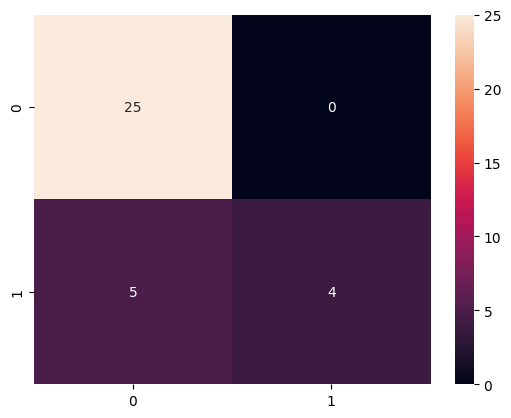

Accuracy: 85.29411764705883
Precision: 100.0
Recall Score 44.44444444444444
F1 Score 85.29411764705883
ROC AUC Score 72.22222222222221


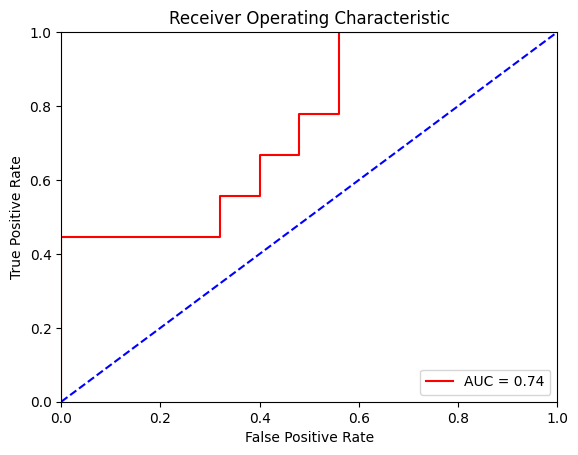

In [226]:
# Performance without hyperparameter tuning
Model = lgb.LGBMClassifier(n_estimators=1000,num_leaves=100,learning_rate=0.001,min_child_samples=10)
BaseModel_Raw='LGB'
# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = Get_Data_Train_Test_Splits(RawDF.copy(deep=True))

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(xtrain, ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/UnSMOTE_{BaseModel_Raw}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
probs = Model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ytest, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Best Model For Smote Dataset

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 134, number of negative: 134
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

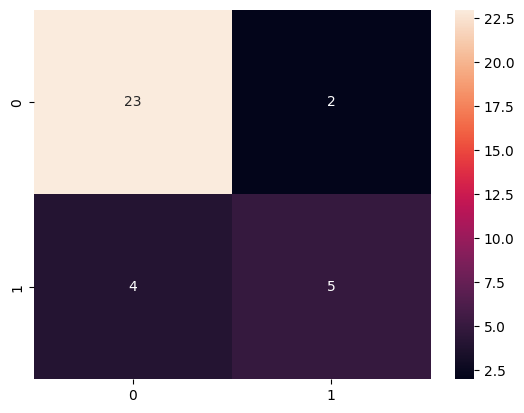

Accuracy: 82.35294117647058
Precision: 71.42857142857143
Recall Score 55.55555555555556
F1 Score 82.35294117647058
ROC AUC Score 73.77777777777779


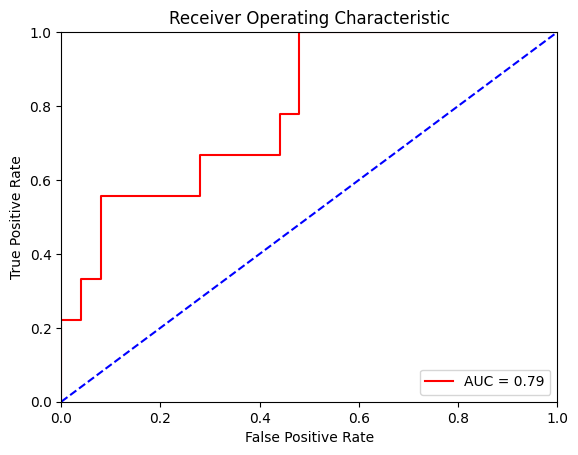

In [177]:
# Performance without hyperparameter tuning
Model = lgb.LGBMClassifier(num_leaves=200)
BaseModel_Raw='LGB'
# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(xtrain, ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/SMOTE_{BaseModel_Raw}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
probs = Model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ytest, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Do Cross-Validation

In [59]:
def Cross_Validate_New(Model_dict,X,Y):
    df = pd.DataFrame(columns=['Model','Mode','Cross Validation Folds 1','Cross Validation Folds 2','Cross Validation Folds 3','Cross Validation Folds 4','Cross Validation Folds 5','Mean Value'])
    for modelName,Model in Model_dict.items():
        cv = cross_validate(Model, X, Y, scoring="accuracy",cv=5,return_train_score=True)
        new_row = {'Model':modelName,'Mode':'Train','Cross Validation Folds 1':cv['train_score'][0],'Cross Validation Folds 2':cv['train_score'][1],'Cross Validation Folds 3':cv['train_score'][2],'Cross Validation Folds 4':cv['train_score'][3],'Cross Validation Folds 5':cv['train_score'][4],'Mean Value':cv['train_score'].mean()}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        new_row = {'Model':modelName,'Mode':'Test','Cross Validation Folds 1':cv['test_score'][0],'Cross Validation Folds 2':cv['test_score'][1],'Cross Validation Folds 3':cv['test_score'][2],'Cross Validation Folds 4':cv['test_score'][3],'Cross Validation Folds 5':cv['test_score'][4],'Mean Value':cv['test_score'].mean()}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df = df.groupby(['Model','Mode']).agg({'Cross Validation Folds 1':'mean','Cross Validation Folds 2':'mean','Cross Validation Folds 3':'mean','Cross Validation Folds 4':'mean','Cross Validation Folds 5':'mean','Mean Value':'mean'})
    return df

# Cross Validation of Raw Dataset

In [63]:
Models_Dict = {
    'LGB': lgb.LGBMClassifier(),
    'SVC': SVC(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
}

X = df.drop('mental_health_issues_personal_declaration',axis=1)
y = df['mental_health_issues_personal_declaration']
DF_Results = Cross_Validate_New(Models_Dict,X,y)
DF_Results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50, number of negative: 127
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.282486 -> initscore=-0.932164
[LightGBM] [Info] Start training from score -0.932164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Cross Validation Folds 1  \
Model                       Mode                              
LGB                         Test                       0.84   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.22   
                            Train                      0.34   
SVC                         Test                       0.71   
                            Train                      0.79   

                                   Cross Validation Folds 2  \
Model                       Mode                              
LGB                         Test                       0.73   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.24   
                            Train                      0.28   
SVC                         Test                       0.67   
                            Train                      0.80   

                                   Cross Validation Folds 3  \
Model                       Mode                              
LGB                         Test                       0.98   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.70   
                            Train                      0.72   
SVC                         Test                       0.86   
                            Train                      0.72   

                                   Cross Validation Folds 4  \
Model                       Mode                              
LGB                         Test                       0.80   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.27   
                            Train                      0.29   
SVC                         Test                       0.70   
                            Train                      0.81   

                                   Cross Validation Folds 5  Mean Value  
Model                       Mode                                         
LGB                         Test                       0.77        0.82  
                            Train                      1.00        1.00  
PassiveAggressiveClassifier Test                       0.25        0.34  
                            Train                      0.28        0.38  
SVC                         Test                       0.75        0.74  
                            Train                      0.78        0.78

In [64]:
#get top model from DF_results
Estimator_Raw = DF_Results.index[0][0]
print(f'The top performing model from Cross Validation is: {Estimator_Raw}')

The top performing model from Cross Validation is: LGB


In [65]:
BaseModel_Raw = None
if Estimator_Raw == 'PassiveAggressiveClassifier':
    BaseModel_Raw = PassiveAggressiveClassifier()
elif Estimator_Raw == 'LGB':
    BaseModel_Raw = KNeighborsClassifier()
else:
    BaseModel_Raw = SVC()

# Cross Validation of SMOTE Dataset¶

In [66]:
SMOTE_DF.head()

cost_of_study  diagnosed_professional  ethnic_group_White  \
0          25000                       0                0.00   
1            383                       1                1.00   
2           9323                       0                1.00   
3          25000                       0                0.00   
4          25000                       0                0.00   

   hours_per_week_university_work  hours_per_week_lectures  \
0                              40                       25   
1                              40                       25   
2                              20                       10   
3                              34                       25   
4                              27                       11   

   personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                        0.00             22                    0   
1                        0.00             21                    1   
2                        1.00             24                    3   
3                        0.00             27                    0   
4                        0.00             27                    1   

   total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                         9                 0  ...                 0   
1                         6                 1  ...                 0   
2                         4                 0  ...                 0   
3                         9                 0  ...                 0   
4                         3                 0  ...                 0   

   institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                         1.00                0.00                    1   
1                         0.00                0.00                    0   
2                         0.00                0.00                    1   
3                         1.00                0.00                    1   
4                         0.00                0.00                    0   

   student_type_location_Home student  student_type_location_European student  \
0                                1.00                                    0.00   
1                                1.00                                    0.00   
2                                0.00                                    0.00   
3                                1.00                                    0.00   
4                                0.00                                    1.00   

   stress_before_exams  institution_country_United Kingdom  work_field_1.0  \
0                    1                                0.00            0.00   
1                    1                                0.00            0.00   
2                    1                                1.00            0.00   
3                    1                                0.00            0.00   
4                    1                                1.00            0.00   

   mental_health_issues_personal_declaration  
0                                          0  
1                                          1  
2                                          1  
3                                          0  
4                                          0  

[5 rows x 51 columns]

In [68]:
Models_Dict = {
    'LGB': lgb.LGBMClassifier(),
    'SVC': SVC(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
}

X = SMOTE_DF.drop('mental_health_issues_personal_declaration',axis=1)
y = SMOTE_DF['mental_health_issues_personal_declaration']
DF_Results = Cross_Validate_New(Models_Dict,X,y)
DF_Results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 114, number of negative: 127
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473029 -> initscore=-0.107989
[LightGBM] [Info] Start training from score -0.107989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

Cross Validation Folds 1  \
Model                       Mode                              
LGB                         Test                       0.75   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.39   
                            Train                      0.37   
SVC                         Test                       0.67   
                            Train                      0.66   

                                   Cross Validation Folds 2  \
Model                       Mode                              
LGB                         Test                       0.82   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.48   
                            Train                      0.49   
SVC                         Test                       0.74   
                            Train                      0.63   

                                   Cross Validation Folds 3  \
Model                       Mode                              
LGB                         Test                       0.87   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.53   
                            Train                      0.52   
SVC                         Test                       0.60   
                            Train                      0.69   

                                   Cross Validation Folds 4  \
Model                       Mode                              
LGB                         Test                       0.87   
                            Train                      1.00   
PassiveAggressiveClassifier Test                       0.57   
                            Train                      0.57   
SVC                         Test                       0.58   
                            Train                      0.69   

                                   Cross Validation Folds 5  Mean Value  
Model                       Mode                                         
LGB                         Test                       0.88        0.84  
                            Train                      1.00        1.00  
PassiveAggressiveClassifier Test                       0.48        0.49  
                            Train                      0.47        0.48  
SVC                         Test                       0.68        0.66  
                            Train                      0.65        0.66

In [69]:
#get top model from DF_results
Estimator_SMOTE = DF_Results.index[0][0]
print(f'The top performing model from Cross Validation is: {Estimator_SMOTE}')

The top performing model from Cross Validation is: LGB


In [70]:

BaseModel_Raw = None
if Estimator_Raw == 'PassiveAggressiveClassifier':
    BaseModel_Raw = PassiveAggressiveClassifier()
elif Estimator_Raw == 'LGB':
    BaseModel_Raw = KNeighborsClassifier()
else:
    BaseModel_Raw = SVC()

# 25th percentile benchmark for the feature importance and presenting the results

In [72]:
RawDF.copy(deep=True)

cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       1                1.00   
1            25000                       0                0.00   
2            25000                       0                0.00   
3            25000                       0                1.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
218          25000                       0                0.00   
219           9031                       1                1.00   
220            564                       0                1.00   
221           8817                       0                0.00   
222           3887                       1                1.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                32                       22   
1                                10                        8   
2                                25                       15   
3                                25                       15   
4                                11                        6   
..                              ...                      ...   
218                              31                        8   
219                              30                        7   
220                              21                       18   
221                              35                       15   
222                               0                        0   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             24                    1   
1                          0.00             30                    0   
2                          1.00             23                    0   
3                          0.00             22                    1   
4                          1.00             32                    0   
..                          ...            ...                  ...   
218                        0.00             32                    0   
219                        0.00             23                    3   
220                        1.00             32                    1   
221                        0.00             32                    0   
222                        1.00             28                    0   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                          19                 0  ...                 0   
1                           4                 0  ...                 0   
2                           1                 0  ...                 0   
3                           4                 0  ...                 0   
4                           7                 0  ...                 0   
..                        ...               ...  ...               ...   
218                         1                 0  ...                 1   
219                         4                 0  ...                 0   
220                         2                 1  ...                 0   
221                         2                 0  ...                 1   
222                        10                 0  ...                 1   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           0.00                0.00                    0   
1                           0.00                0.00                    0   
2                           0.00                1.00                    0   
3                           0.00                0.00                    1   
4                           0.00                0.00                    1   
..                           ...                 ...                  ...   
218                         0.00                0.00                    0   
219                         0.00                0.00                    0   
220     

In [73]:
per_25_df = Drop_Rows_Below_25_Percentile(df=RawDF.copy(deep=True),col='cost_of_study')

Following columns are being dropped
     cost_of_study  diagnosed_professional  ethnic_group_White  \
39           11151                       0                1.00   
49           11078                       1                0.00   
70           11068                       0                1.00   
41           10653                       0                0.00   
135          10086                       1                1.00   
196           9875                       0                1.00   
163           9587                       1                1.00   
201           9567                       0                0.00   
162           9443                       0                1.00   
164           9427                       0                1.00   
197           9347                       0                1.00   
198           9323                       0                1.00   
152           9314                       0                1.00   
61            9277                      

In [74]:
per_25_df

cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       1                1.00   
1            25000                       0                0.00   
2            25000                       0                0.00   
3            25000                       0                1.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
214          25000                       0                0.00   
215          25000                       0                0.00   
216          25000                       0                0.00   
217          25000                       0                0.00   
218          25000                       0                0.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                32                       22   
1                                10                        8   
2                                25                       15   
3                                25                       15   
4                                11                        6   
..                              ...                      ...   
214                              40                       29   
215                              25                       15   
216                              26                       30   
217                              25                       12   
218                              31                        8   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             24                    1   
1                          0.00             30                    0   
2                          1.00             23                    0   
3                          0.00             22                    1   
4                          1.00             32                    0   
..                          ...            ...                  ...   
214                        0.00             28                    0   
215                        0.00             24                    0   
216                        0.00             20                    0   
217                        0.00             30                    0   
218                        0.00             32                    0   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                          19                 0  ...                 0   
1                           4                 0  ...                 0   
2                           1                 0  ...                 0   
3                           4                 0  ...                 0   
4                           7                 0  ...                 0   
..                        ...               ...  ...               ...   
214                        50                 0  ...                 0   
215                         2                 0  ...                 0   
216                         8                 0  ...                 0   
217                         6                 0  ...                 0   
218                         1                 0  ...                 1   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           0.00                0.00                    0   
1                           0.00                0.00                    0   
2                           0.00                1.00                    0   
3                           0.00                0.00                    1   
4                           0.00                0.00                    1   
..                           ...                 ...                  ...   
214                         1.00                0.00                    1   
215                         1.00                0.00                    1   
216     

In [75]:
# Splitting the dataframe into train and test, and oversampling the train dataset only
SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE = OverSample_DF(per_25_df)
Smote_Train_DF = pd.concat([SMOTE_Train_X,SMOTE_Train_Y],axis=1)

print('Train DataFrame after SMOTE on Train')
print('Label value counts after SMOTE')
print(Smote_Train_DF['mental_health_issues_personal_declaration'].value_counts())

Smote_Train_DF

Train DataFrame after SMOTE on Train
Label value counts after SMOTE
mental_health_issues_personal_declaration
0    116
1    116
Name: count, dtype: int64


cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       0                0.00   
1            25000                       1                1.00   
2            25000                       0                0.00   
3            25000                       0                0.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
227          25000                       0                0.00   
228          25542                       0                0.76   
229          25000                       0                0.17   
230          25000                       0                0.78   
231          25000                       1                1.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                15                        7   
1                                28                       19   
2                                 8                        8   
3                                20                        8   
4                                 4                       10   
..                              ...                      ...   
227                               5                        5   
228                              20                       11   
229                              25                       15   
230                              27                       18   
231                              26                       17   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             21                    3   
1                          0.00             23                    1   
2                          0.00             29                    0   
3                          0.00             32                    0   
4                          1.00             21                    0   
..                          ...            ...                  ...   
227                        1.00             29                    0   
228                        0.76             30                    1   
229                        0.83             29                    0   
230                        0.22             24                    0   
231                        0.56             23                    1   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                           5                 0  ...                 0   
1                          19                 0  ...                 0   
2                           4                 0  ...                 0   
3                           8                 0  ...                 0   
4                           2                 0  ...                 0   
..                        ...               ...  ...               ...   
227                        11                 0  ...                 0   
228                         6                 0  ...                 0   
229                         4                 0  ...                 0   
230                        15                 0  ...                 0   
231                        19                 0  ...                 0   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           1.00                0.00                    0   
1                           0.00                0.00                    0   
2                           0.00                1.00                    1   
3                           0.00                0.00                    0   
4                           1.00                0.00                    1   
..                           ...                 ...                  ...   
227                         0.00                1.00                    0   
228                         0.00                0.00                    1   
229     

In [76]:
Test_DF = pd.concat([Test_X_Not_SMOTE,Test_Y_Not_SMOTE],axis=1)
Smote_Train_DF = pd.concat([SMOTE_Train_X,SMOTE_Train_Y],axis=1)

print('Train and Test combined DataFrame after SMOTE on Train')
print('Label value counts after SMOTE')
print(SMOTE_DF['mental_health_issues_personal_declaration'].value_counts())

SMOTE_DF

Train and Test combined DataFrame after SMOTE on Train
Label value counts after SMOTE
mental_health_issues_personal_declaration
0    159
1    143
Name: count, dtype: int64


cost_of_study  diagnosed_professional  ethnic_group_White  \
0            25000                       0                0.00   
1              383                       1                1.00   
2             9323                       0                1.00   
3            25000                       0                0.00   
4            25000                       0                0.00   
..             ...                     ...                 ...   
69             574                       0                0.00   
93           25000                       0                0.00   
16           25000                       0                0.00   
109          25000                       0                0.00   
156           9250                       1                1.00   

     hours_per_week_university_work  hours_per_week_lectures  \
0                                40                       25   
1                                40                       25   
2                                20                       10   
3                                34                       25   
4                                27                       11   
..                              ...                      ...   
69                               50                       17   
93                               50                       30   
16                               32                       10   
109                              25                       21   
156                              25                       18   

     personality_type_Introvert  year_of_birth  alcohol_consumption  \
0                          0.00             22                    0   
1                          0.00             21                    1   
2                          1.00             24                    3   
3                          0.00             27                    0   
4                          0.00             27                    1   
..                          ...            ...                  ...   
69                         0.00             21                    1   
93                         0.00             21                    3   
16                         0.00             24                    0   
109                        0.00             22                    0   
156                        1.00             20                    0   

     total_social_media_hours  home_country_0_1  ...  home_country_0_2  \
0                           9                 0  ...                 0   
1                           6                 1  ...                 0   
2                           4                 0  ...                 0   
3                           9                 0  ...                 0   
4                           3                 0  ...                 0   
..                        ...               ...  ...               ...   
69                          3                 1  ...                 0   
93                         13                 0  ...                 0   
16                          4                 0  ...                 0   
109                         1                 0  ...                 0   
156                        15                 0  ...                 1   

     institution_country_Nigeria  ethnic_group_Asian  course_of_study_0_5  \
0                           1.00                0.00                    1   
1                           0.00                0.00                    0   
2                           0.00                0.00                    1   
3                           1.00                0.00                    1   
4                           0.00                0.00                    0   
..                           ...                 ...                  ...   
69                          0.00                0.00                    1   
93                          1.00                0.00                    1   
16      

In [77]:
x_train, x_test, y_train, y_test = Get_Data_Train_Test_Splits(per_25_df)

In [197]:
#Getting performance of 29 models before and after oversampling
print('Performance using Raw Dataset splits')
print('------------------------------------')
Evaluate_Dataset_Using_LazyClassifier(x_train, x_test, y_train, y_test)

Performance using Raw Dataset splits
------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.39it/s]

[LightGBM] [Info] Number of positive: 25, number of negative: 116
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 141, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.177305 -> initscore=-1.534714
[LightGBM] [Info] Start training from score -1.534714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.92               0.85     0.85      0.92   
LinearSVC                          0.88               0.83     0.83      0.89   
Perceptron                         0.88               0.83     0.83      0.89   
DecisionTreeClassifier             0.80               0.78     0.78      0.82   
SGDClassifier                      0.88               0.73     0.73      0.87   
AdaBoostClassifier                 0.88               0.73     0.73      0.87   
RidgeClassifierCV                  0.84               0.70     0.70      0.84   
LinearDiscriminantAnalysis         0.84               0.70     0.70      0.84   
LogisticRegression                 0.84               0.70     0.70      0.84   
NearestCentroid                    0.84               0.70     0.70      0.84   
RidgeClassifier                    0.84               0.70     0.70      0.84   
QuadraticDiscriminantAnalysis      0.88               0.62     0.62      0.85   
KNeighborsClassifier               0.84               0.60     0.60      0.82   
BaggingClassifier                  0.84               0.60     0.60      0.82   
CalibratedClassifierCV             0.84               0.60     0.60      0.82   
ExtraTreeClassifier                0.80               0.58     0.58      0.79   
GaussianNB                         0.80               0.58     0.58      0.79   
XGBClassifier                      0.80               0.58     0.58      0.79   
ExtraTreesClassifier               0.80               0.58     0.58      0.79   
BernoulliNB                        0.80               0.58     0.58      0.79   
SVC                                0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
LabelSpreading                     0.84               0.50     0.50      0.77   
LabelPropagation                   0.84               0.50     0.50      0.77   
RandomForestClassifier             0.80               0.48     0.48      0.75   
LGBMClassifier                     0.76               0.45     0.45      0.73   

                               Time Taken  
Model                                      
PassiveAggressiveClassifier          0.03  
LinearSVC                            0.05  
Perceptron                           0.04  
DecisionTreeClassifier               0.02  
SGDClassifier                        0.02  
AdaBoostClassifier                   0.17  
RidgeClassifierCV                    0.03  
LinearDiscriminantAnalysis           0.02  
LogisticRegression                   0.03  
NearestCentroid                      0.02  
RidgeClassifier                      0.05  
QuadraticDiscriminantAnalysis        0.06  
KNeighborsClassifier                 0.05  
BaggingClassifier                    0.07  
CalibratedClassifierCV               0.07  
ExtraTreeClassifier                  0.02  
GaussianNB                           0.03  
XGBClassifier                        0.09  
ExtraTreesClassifier                 0.24  
BernoulliNB                          0.03  
SVC                                  0.03  
DummyClassifier                      0.02  
LabelSpreading                       0.03  
LabelPropagation                     0.02  
RandomForestClassifier               0.40  
LGBMClassifier                       0.08

In [207]:
print('Performance using SMOTE Dataset splits')
Evaluate_Dataset_Using_LazyClassifier(SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE)

Performance using SMOTE Dataset splits


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.18it/s]

[LightGBM] [Info] Number of positive: 116, number of negative: 116
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 232, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.92               0.95     0.95      0.93   
RidgeClassifierCV                  0.88               0.93     0.93      0.89   
BernoulliNB                        0.88               0.83     0.83      0.89   
LinearSVC                          0.84               0.80     0.80      0.85   
LinearDiscriminantAnalysis         0.84               0.80     0.80      0.85   
CalibratedClassifierCV             0.84               0.80     0.80      0.85   
RidgeClassifier                    0.84               0.80     0.80      0.85   
PassiveAggressiveClassifier        0.84               0.80     0.80      0.85   
LogisticRegression                 0.84               0.80     0.80      0.85   
DecisionTreeClassifier             0.92               0.75     0.75      0.91   
XGBClassifier                      0.84               0.70     0.70      0.84   
SGDClassifier                      0.84               0.70     0.70      0.84   
AdaBoostClassifier                 0.84               0.70     0.70      0.84   
LGBMClassifier                     0.84               0.70     0.70      0.84   
Perceptron                         0.80               0.68     0.68      0.81   
KNeighborsClassifier               0.72               0.63     0.63      0.75   
ExtraTreeClassifier                0.72               0.63     0.63      0.75   
QuadraticDiscriminantAnalysis      0.88               0.62     0.62      0.85   
BaggingClassifier                  0.80               0.58     0.58      0.79   
RandomForestClassifier             0.80               0.58     0.58      0.79   
GaussianNB                         0.80               0.58     0.58      0.79   
ExtraTreesClassifier               0.80               0.58     0.58      0.79   
DummyClassifier                    0.84               0.50     0.50      0.77   
NuSVC                              0.80               0.48     0.48      0.75   
SVC                                0.80               0.48     0.48      0.75   
LabelSpreading                     0.76               0.45     0.45      0.73   
LabelPropagation                   0.76               0.45     0.45      0.73   

                               Time Taken  
Model                                      
NearestCentroid                      0.05  
RidgeClassifierCV                    0.06  
BernoulliNB                          0.04  
LinearSVC                            0.04  
LinearDiscriminantAnalysis           0.05  
CalibratedClassifierCV               0.09  
RidgeClassifier                      0.04  
PassiveAggressiveClassifier          0.04  
LogisticRegression                   0.06  
DecisionTreeClassifier               0.04  
XGBClassifier                        0.12  
SGDClassifier                        0.03  
AdaBoostClassifier                   0.30  
LGBMClassifier                       0.10  
Perceptron                           0.03  
KNeighborsClassifier                 0.04  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.04  
BaggingClassifier                    0.14  
RandomForestClassifier               0.35  
GaussianNB                           0.03  
ExtraTreesClassifier                 0.28  
DummyClassifier                      0.03  
NuSVC                                0.03  
SVC                                  0.04  
LabelSpreading                       0.03  
LabelPropagation                     0.04

# Save Best Model

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.67      1.00      0.80         4

    accuracy                           0.92        25
   macro avg       0.83      0.95      0.88        25
weighted avg       0.95      0.92      0.93        25

Confusion Matrix


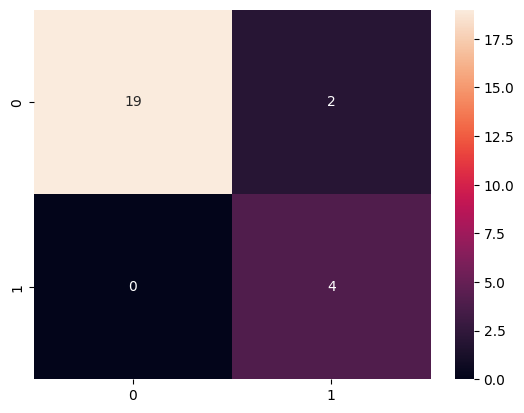

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 92.0
Precision: 66.66666666666666
Recall Score 100.0
F1 Score 92.0
ROC AUC Score 95.23809523809523


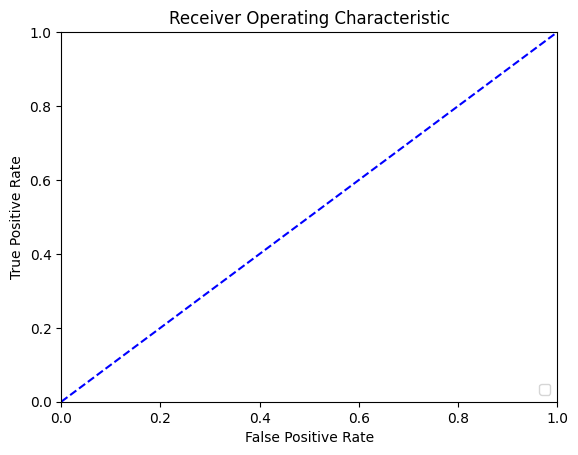

In [220]:
# Performance without hyperparameter tuning
Model = PassiveAggressiveClassifier()
BaseModel_Raw='PAC'
# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = Get_Data_Train_Test_Splits(per_25_df)

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(xtrain, ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/UnSMOTE_{BaseModel_Raw}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
# probs = Model.predict_proba(xtest)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(ytest, preds)
# roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Best Model For Smote Dataset

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.67      1.00      0.80         4

    accuracy                           0.92        25
   macro avg       0.83      0.95      0.88        25
weighted avg       0.95      0.92      0.93        25

Confusion Matrix


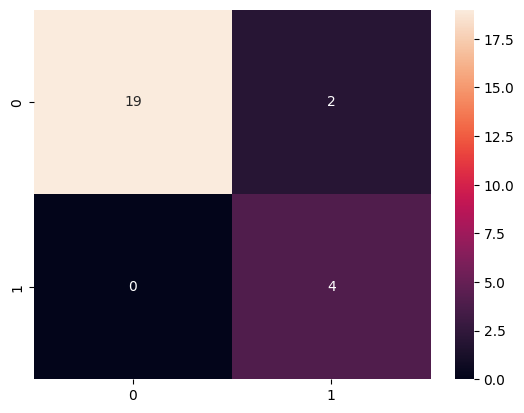

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 92.0
Precision: 66.66666666666666
Recall Score 100.0
F1 Score 92.0


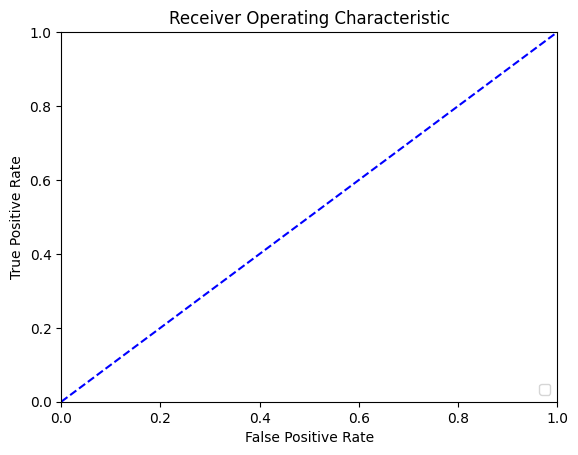

In [216]:
# Performance without hyperparameter tuning
Model =RidgeClassifierCV()
BaseModel_Raw='rcmodel'
# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(xtrain, ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/SMOTE_{BaseModel_Raw}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
# print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
# probs = Model.predict_proba(xtest)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(ytest, preds)
# roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Cross Validation

In [78]:
Models_Dict = {
    'LGB': lgb.LGBMClassifier(),
    'SVC': SVC(),
    'RidgeClassifierCV': RidgeClassifierCV(),
}

X = per_25_df.drop('mental_health_issues_personal_declaration',axis=1)
y = per_25_df['mental_health_issues_personal_declaration']
DF_Results = Cross_Validate_New(Models_Dict,X,y)
DF_Results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23, number of negative: 109
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 132, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174242 -> initscore=-1.555854
[LightGBM] [Info] Start training from score -1.555854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23, number of negative: 110
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 133, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.172932 -> initscore=-1.564986
[LightGBM] [Info] Start training from score -1.564986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Cross Validation Folds 1  Cross Validation Folds 2  \
Model             Mode                                                        
LGB               Test                       0.82                      0.79   
                  Train                      1.00                      1.00   
RidgeClassifierCV Test                       0.82                      0.79   
                  Train                      0.90                      0.92   
SVC               Test                       0.82                      0.82   
                  Train                      0.83                      0.83   

                         Cross Validation Folds 3  Cross Validation Folds 4  \
Model             Mode                                                        
LGB               Test                       0.82                      0.88   
                  Train                      1.00                      1.00   
RidgeClassifierCV Test                       0.79                      0.79   
                  Train                      0.92                      0.93   
SVC               Test                       0.82                      0.82   
                  Train                      0.83                      0.83   

                         Cross Validation Folds 5  Mean Value  
Model             Mode                                         
LGB               Test                       0.79        0.82  
                  Train                      1.00        1.00  
RidgeClassifierCV Test                       0.73        0.78  
                  Train                      0.93        0.92  
SVC               Test                       0.85        0.83  
                  Train                      0.83        0.83

In [79]:
#get top model from DF_results
Estimator_SMOTE = DF_Results.index[0][0]
print(f'The top performing model from Cross Validation is: {Estimator_SMOTE}')


The top performing model from Cross Validation is: LGB


In [80]:
BaseModel_Raw = None
if Estimator_Raw == 'PassiveAggressiveClassifier':
    BaseModel_Raw = PassiveAggressiveClassifier()
elif Estimator_Raw == 'LGB':
    BaseModel_Raw = KNeighborsClassifier()
else:
    BaseModel_Raw = SVC()

# Cross Validation On SMOTE DF

In [81]:
Models_Dict = {
    'LGB': lgb.LGBMClassifier(),
    'SVC': SVC(),
    'RidgeClassifierCV': RidgeClassifierCV(),
}

X = SMOTE_DF.drop('mental_health_issues_personal_declaration',axis=1)
y = SMOTE_DF['mental_health_issues_personal_declaration']
DF_Results = Cross_Validate_New(Models_Dict,X,y)
DF_Results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 114, number of negative: 127
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473029 -> initscore=-0.107989
[LightGBM] [Info] Start training from score -0.107989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 115, number of negative: 127
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475207 -> initscore=-0.099255
[LightGBM] [Info] Start training from score -0.099255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Cross Validation Folds 1  Cross Validation Folds 2  \
Model             Mode                                                        
LGB               Test                       0.75                      0.82   
                  Train                      1.00                      1.00   
RidgeClassifierCV Test                       0.84                      0.80   
                  Train                      0.93                      0.92   
SVC               Test                       0.67                      0.74   
                  Train                      0.66                      0.63   

                         Cross Validation Folds 3  Cross Validation Folds 4  \
Model             Mode                                                        
LGB               Test                       0.87                      0.87   
                  Train                      1.00                      1.00   
RidgeClassifierCV Test                       0.85                      0.83   
                  Train                      0.89                      0.88   
SVC               Test                       0.60                      0.58   
                  Train                      0.69                      0.69   

                         Cross Validation Folds 5  Mean Value  
Model             Mode                                         
LGB               Test                       0.88        0.84  
                  Train                      1.00        1.00  
RidgeClassifierCV Test                       0.85        0.83  
                  Train                      0.91        0.90  
SVC               Test                       0.68        0.66  
                  Train                      0.65        0.66

In [82]:
#get top model from DF_results
Estimator_SMOTE = DF_Results.index[0][0]
print(f'The top performing model from Cross Validation is: {Estimator_SMOTE}')


The top performing model from Cross Validation is: LGB


In [83]:
BaseModel_Raw = None
if Estimator_Raw == 'PassiveAggressiveClassifier':
    BaseModel_Raw = PassiveAggressiveClassifier()
elif Estimator_Raw == 'LGB':
    BaseModel_Raw = KNeighborsClassifier()
else:
    BaseModel_Raw = SVC()